## Importing the required libraries

In [1]:
# Library required for structured Python code

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Library required to suppress any warning messages

import warnings

warnings.filterwarnings("ignore")

# Libraries required for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)  # adds background to the graph

# Remove the limit for number of displayed rows and columns
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.2f" % x)

<IPython.core.display.Javascript object>

In [3]:
# Libraries required for data preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Library required to split the data
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [4]:
# Libraries required to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

# Libraries required for hyperparameter tuning
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    cross_val_score,
    StratifiedKFold,
)

# Libraries to get different metric scores
# from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)

<IPython.core.display.Javascript object>

## Load Dataset

In [5]:
# reading the dataset

customer_churn_data = pd.read_excel(
    "C:\Sridevi\Jupyter_Notebook_files\Capstone Project\Customer Churn Data.xlsx",
    sheet_name="Data",
)

<IPython.core.display.Javascript object>

In [6]:
data = customer_churn_data.copy()  # creating a copy of the dataset

<IPython.core.display.Javascript object>

## Data Structure Analysis

In [7]:
# Checking the number of rows and columns in the data

data.shape

(11260, 19)

<IPython.core.display.Javascript object>

- The dataset has 11260 rows and 19 columns

In [8]:
# Viewing 10 random observations from the dataset
data.sample(10)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
7930,27930,0,28,1.00,12.00,Credit Card,Female,2.00,5,Regular,3.00,Married,7,0.00,14,4,11,298.87,Mobile
2060,22060,0,6,1.00,6.00,UPI,Female,2.00,1,Super,4.00,Married,2,1.00,13,1,2,154.88,Computer
3326,23326,1,1,1.00,32.00,Debit Card,Female,4.00,4,Regular Plus,4.00,Married,NaN,1.00,20,1,9,145.22,Computer
9806,29806,0,6,1.00,14.00,Debit Card,Male,4.00,2,Regular Plus,4.00,Married,2,1.00,14,2,NaN,159.98,Mobile
1355,21355,0,8,1.00,22.00,Credit Card,Male,2.00,1,Regular Plus,4.00,Married,1,0.00,13,1,3,124.26,Mobile
4885,24885,1,1,1.00,21.00,UPI,Male,3.00,5,Regular Plus,4.00,NaN,3,1.00,25,2,3,162.43,Mobile
5338,25338,0,1,3.00,9.00,Credit Card,Female,3.00,4,Regular Plus,3.00,Single,3,0.00,20,1,3,152.83,Mobile
11048,31048,0,3,1.00,15.00,Cash on Delivery,Female,4.00,5,Regular Plus,5.00,Married,6,0.00,16,1,1,151.09,Mobile
6363,26363,0,26,1.00,16.00,Credit Card,Female,2.00,3,Regular,3.00,Married,4,0.00,19,4,7,287.06,Mobile
6189,26189,0,13,3.00,20.00,E wallet,Male,3.00,4,HNI,4.00,Married,7,0.00,13,1,0,204.05,Mobile


<IPython.core.display.Javascript object>

- `AccountID` seems to be unique in the sample but needs to be confirmed
- `Churn` mostly has 0's which suggests that the target variable may be an imbalanced class
- `Tenure` has 0 value, which needs further inspection
- `Payment` shows different payment methods available to customers; also conatins NaN values
- `Gender` of the primary customer of the account has an abbreviated value for Male in one observation; needs to be fixed
- `Account_user_account` suggests a maximum of 5 customers tagged in one account
- `account_segment` shows three varied segments of customers namely Regular, Super and HNI (Highest Net Income). There also seems be a data entry error. 
- `Marital_Status` indicates three categories Single, Married and Divorced
- All column values thus far are yearly, whereas `rev_per_month` is not so. 
- `Complain_ly` has 0's as well as NaN values, which needs further investigation
- On an average, `Regular` account_segment seems to have higher `rev_growth_yoy` comparatively
- `coupon_used_for_payment` is anywhere between 0 and 5 times
- `Account_user_account`, `rev_per_month`, `Login_device` has special characters that needs to be imputed with valid data after further exploration

In [9]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

<IPython.core.display.Javascript object>

- No missing values in `AccountID`, `Churn`, `rev_growth_yoy` and `coupon_used_for_payment`.
- Numerical features listed under 'object' data type might indicate data entry error. Needs further inspection.
- 5 float, 2 int and 12 object type columns
- memory used is 1.6+ MB

In [10]:
# Checking for duplicated values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplicated values in the dataset

In [11]:
# Checking for the number of missing values in the dataset

data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# Checking for the perentage of missing values in the dataset

data.isnull().sum() / data.isnull().count() * 100

AccountID                 0.00
Churn                     0.00
Tenure                    0.91
City_Tier                 0.99
CC_Contacted_LY           0.91
Payment                   0.97
Gender                    0.96
Service_Score             0.87
Account_user_count        0.99
account_segment           0.86
CC_Agent_Score            1.03
Marital_Status            1.88
rev_per_month             0.91
Complain_ly               3.17
rev_growth_yoy            0.00
coupon_used_for_payment   0.00
Day_Since_CC_connect      3.17
cashback                  4.18
Login_device              1.96
dtype: float64

<IPython.core.display.Javascript object>

- `cashback` has the highest percentage of missing values followed by `Complain_ly` and `Day_Since_CC_connect`

In [13]:
# Checking the number of unique values in each column

data.nunique()

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                    5693
Login_device                   3
dtype: int64

<IPython.core.display.Javascript object>

- `AccountID` has 11260 unique values which means there are no duplicate observations of the customers as seen above
- Large number of unique values in the numerical columns

In [14]:
# Making a list of all categorical variables

cat_cols = ["Payment", "Gender", "account_segment", "Marital_Status", "Login_device"]

<IPython.core.display.Javascript object>

In [15]:
# Printing the number of unique values in each categorical variable

for i in cat_cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")
    print("-" * 40)


Unique values in Payment are :
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


----------------------------------------

Unique values in Gender are :
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


----------------------------------------

Unique values in account_segment are :
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64


----------------------------------------

Unique values in Marital_Status are :
Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


----------------------------------------

Unique values in Login_device are :
Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64


----------------------------------------


<IPython.core.display.Javascript object>

- `Payment` - There are five different payment methods of which Debit card is the most preferred followed by Credit card. UPI is the least preferred one
- `Gender` - Consists of data entry error that needs to be fixed
- `account_segment` - Five different segments namely Regular, Regular Plus, Super, Super Plus, HNI. Consists of data entry error that needs to be fixed as well
- `Marital_Status` - Large number of customers are Married followed by Single and Divorced customers
- `Login_device` - Three unique values of which further inspection needs to made if '&&&&' can be treated as missing value or an unknown category

In [16]:
# Fixing the data entry errors

data["Gender"] = data["Gender"].replace("F", "Female")
data["Gender"] = data["Gender"].replace("M", "Male")
data["account_segment"] = data["account_segment"].replace("Regular +", "Regular Plus")
data["account_segment"] = data["account_segment"].replace("Super +", "Super Plus")

data["Login_device"] = data["Login_device"].replace(
    "&&&&", "Other"
)  # will decide if this is to be treated as a missing value or an 'Unknown' category after EDA

<IPython.core.display.Javascript object>

In [17]:
# Printing the number of unique values in each categorical variable

print("Unique values in Gender are :")
print(data["Gender"].value_counts(), "\n")
print("-" * 40)
print("\nUnique values in account_segment are :")
print(data["account_segment"].value_counts())
print("-" * 40)
print("\nUnique values in account_segment are :")
print(data["Login_device"].value_counts())

Unique values in Gender are :
Male      6704
Female    4448
Name: Gender, dtype: int64 

----------------------------------------

Unique values in account_segment are :
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64
----------------------------------------

Unique values in account_segment are :
Mobile      7482
Computer    3018
Other        539
Name: Login_device, dtype: int64


<IPython.core.display.Javascript object>

- The data entry errors are now fixed
- Large number of primary account holders are Male customers comparatively
- Large number of customers fall under the account segment Regular Plus, followed by Super whereas least number of customers come under the segment Regular

In [18]:
# Making a list of all numerical variables

num_cols = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Service_Score",
    "Account_user_count",
    "CC_Agent_Score",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
]

<IPython.core.display.Javascript object>

In [19]:
# Printing the number of unique values in each numerical variable

for i in num_cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")
    print("-" * 40)


Unique values in Tenure are :
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
27     131
99     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64


----------------------------------------

Unique values in City_Tier are :
1.00    7263
3.00    3405
2.00     480
Name: City_Tier, dtype: int64


----------------------------------------

Unique values in CC_Contacted_LY are :
14.00     682
16.00     663
9.00      655
13.00     655
15.00     623
12.00     571
8.00      538
17.00     525
11.00     524
10.00     489
7.00      391
18.00     374
19.00     364
20.00     319
6.00      311
21.00     310
22.00     282
23.00     241
24.00     214
25.00     197
32.00     192
2

<IPython.core.display.Javascript object>

- There are one or more values such as '#','@','$','+' and '*' present in columns `Tenure, Account_user_count, rev_per_month, 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect'` and `cashback`
- Will replace these values with np.nan in order to do the EDA

In [20]:
# Replacing the invalid data with np.nan

data["Tenure"].replace("#", np.nan, inplace=True)
data["Account_user_count"].replace("@", np.nan, inplace=True)
data["rev_per_month"].replace("+", np.nan, inplace=True)
data["rev_growth_yoy"].replace("$", np.nan, inplace=True)
data["coupon_used_for_payment"].replace(["#", "$", "*"], np.nan, inplace=True)
data["Day_Since_CC_connect"].replace("$", np.nan, inplace=True)
data["cashback"].replace("$", np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [21]:
# Checking for the perentage of missing values again

data.isnull().sum() / data.isnull().count() * 100

AccountID                 0.00
Churn                     0.00
Tenure                    1.94
City_Tier                 0.99
CC_Contacted_LY           0.91
Payment                   0.97
Gender                    0.96
Service_Score             0.87
Account_user_count        3.94
account_segment           0.86
CC_Agent_Score            1.03
Marital_Status            1.88
rev_per_month             7.02
Complain_ly               3.17
rev_growth_yoy            0.03
coupon_used_for_payment   0.03
Day_Since_CC_connect      3.18
cashback                  4.20
Login_device              1.96
dtype: float64

<IPython.core.display.Javascript object>

- It is now seen that the percentage of missing values have considerably increased across columns
- `rev_per_month` has the highest of 7.02% missing values followed by `cashback` with 4.2% and `account_user_count` with 3.94% of missing values
- `rev_growth_yoy` and `coupon_used_for_payment` have the least percentage of missing values

In [22]:
# Checking the statistical summary of the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.00,25629.50,3250.63,20000.00,22814.75,25629.50,28444.25,31259.00
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11042.00,11.03,12.88,0.00,2.00,9.00,16.00,99.00
City_Tier,11148.00,1.65,0.92,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11158.00,17.87,8.85,4.00,11.00,16.00,23.00,132.00
Service_Score,11162.00,2.90,0.73,0.00,2.00,3.00,3.00,5.00
Account_user_count,10816.00,3.69,1.02,1.00,3.00,4.00,4.00,6.00
CC_Agent_Score,11144.00,3.07,1.38,1.00,2.00,3.00,4.00,5.00
rev_per_month,10469.00,6.36,11.91,1.00,3.00,5.00,7.00,140.00
Complain_ly,10903.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00


<IPython.core.display.Javascript object>

- `AccountID` is all unique values and hence it can be set as the index number
- `Churn` - The percentile values indicate that the tagret variable is highly imbalanced where large number of customers have not churned. This is a positive take for the management.
- `Tenure` - The average tenure of account is 11 months and the 75th percentile is 16 months. Tenure has a wide range of 0 to 99 months.
- `City_Tier` - On an average 50% of the customers are from Tier1 cities and about 25% of them from Tier3 cities
- `CC_Contacted_LY` - On an average 17 contacts are made by all the customers of the account in the past year. Minimum being a 4 and maximum being 132. The maximum number might be outliers.
- `Service_Score` - The average satisfaction score is 2.9 whereas the 50th and 75th percentile are both 3. The minimum being a 0 and maximum being a 5.
- `Account_user_count` - On an average 3 customers are tagged to a given account whereas there are a maximum of 6 customers tagged.
- `CC_Agent_Score` - The average customer service score given by a customer is 3, minimum being 1 and maximum is 5.
- `rev_per_month` - The average revenue generated by the account in the past year is 6.36 thousands in INR. The 75th percentile is 7 thousand whereas the maximum value is 140 thousands which indicates skewness in the data.
- `Complain_ly` - The average value is 0.29. All values below 50th percentile is 0 and the 75th percentile is a 1 i.e., only about 25% of the times a complaint was raised by an account in the past year.
- `rev_growth_yoy` - On an average the revenue growth percenatge of the account in the past year is 16.19%, minimum being 4% and maximum being 28%
- `coupon_used_for_payment` - Customers have used coupons on an average of ~2 times in the past year. Minimum is 0 whereas maximum is 16 times.
- `Day_Since_CC_connect` - The average number of days since no customers in the account has contacted the customer care is 4, the maximum is 47 days
- `cashback` - Average monthly cashback generated by the account in the past year is ~196 INR. 75th percentile is 200 and maximum value is 1997, which might be outliers.

In [23]:
# summary of the categorical variables

data.describe(include="object").T

,count,unique,top,freq
Payment,11151,5,Debit Card,4587
Gender,11152,2,Male,6704
account_segment,11163,5,Regular Plus,4124
Marital_Status,11048,3,Married,5860
Login_device,11039,3,Mobile,7482


<IPython.core.display.Javascript object>

- Missing values in all object type variables
- `Payment` - 5 payment methods, where Debit card is the most frequently used mode of payment
- `Gender` - Male customers are largely primary customer of the account
- `account_segment` - 5 different account segments on the basis of spend, with Regular Plus being the most frequent
- `Marital_Status` - ~53% of the customers are Married
- `Login_device` - 3 different types of login devices with Mobile being used most frequently

# Exploratory Data Analysis

In [24]:
# Creating an array of color codes to use in this project
colors = ["#4178FB", "#4DE0FA", "#7DFFC6"]

# Setting custom color palette
sns.set_palette(sns.color_palette(colors))

<IPython.core.display.Javascript object>

## Univariate Analysis

In [25]:
# Defining a method to plot histogram and boxplot combined in a single plot


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    feature : dataframe column
    figsize : size of figure (default (12,7))
    kde : whether to show the density curve (default False)
    bins : number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [26]:
# Defining a method to print the percentage of data points in the plot


def perc_on_bar(plot, feature):
    """
    plot
    feature : categorical feature
    the function won't work if a column is passed in hue parameter
    
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.06  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(
            percentage,
            (x, y),
            # ha="center",
            # va="center",
            size=12,
            # xytext=(0, 3),
            # textcoords="offset points",
        )  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### 1. Churn 

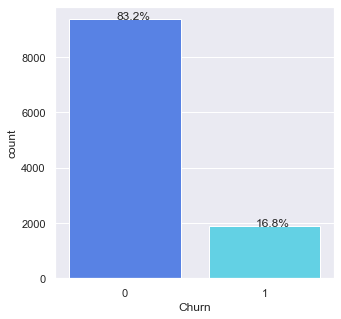

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Churn"])
perc_on_bar(ax, data["Churn"])

- 16.8% of customers have churned whereas 83.2% of them have not i.e., this is an imbalanced classification problem.

### 2. Tenure

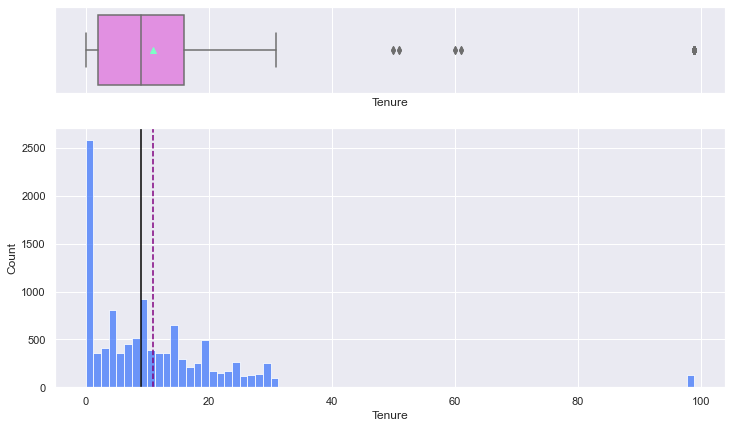

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Tenure")

- Highest number of customers with a tenure of less than a month
- Outliers around 50, 65 and about 100 months

### 3. City Tier

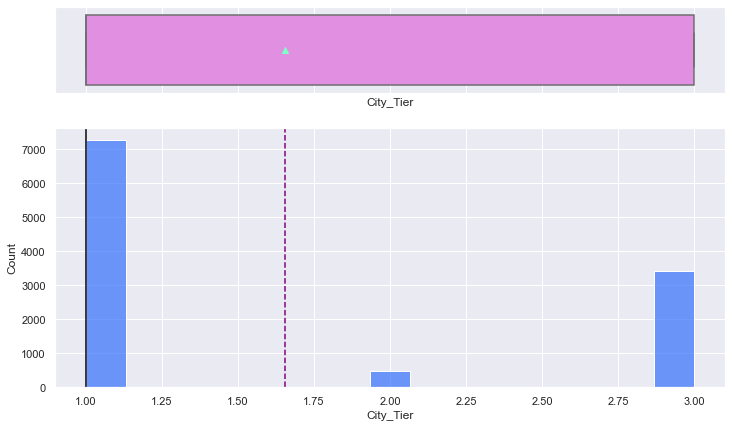

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "City_Tier")

- Most customers are from tier1 cities followed by tier3 cities
- Only about 500 customers are from tier2 cities
- City_Tier can as well be considered as a categorical variable

### 4. Customer Care contact in the past year

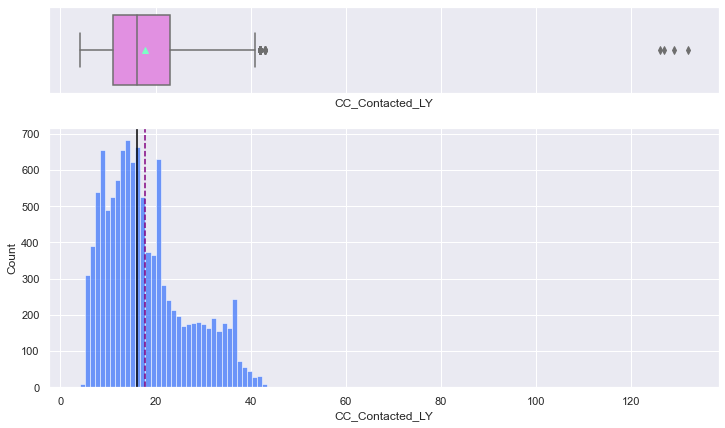

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "CC_Contacted_LY")

- The distribution suggests that the higher number of times the customer care was contacted is between 10 to 25 times
- Outliers around 45 times and way beyond 125 times

### 5. Payment

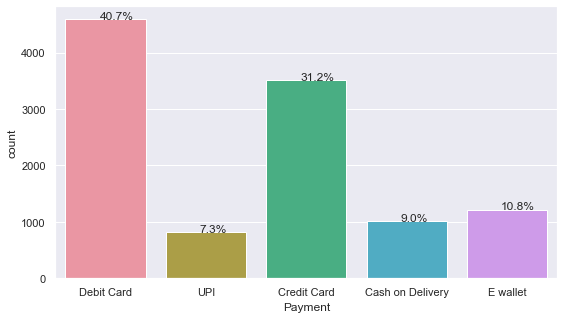

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["Payment"])
perc_on_bar(ax, data["Payment"])

- 40.7% of the customers prefer payment with Debit Card and 31.2% with Credit Card
- UPI (Unified Payment Interface) being the least preferred payment mode owing to the reasons that it is new in the market

### 6. Gender

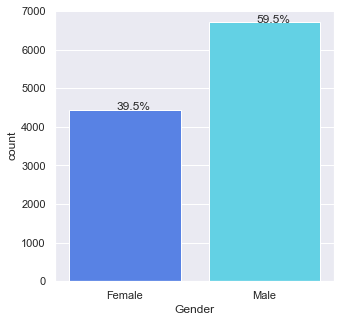

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Gender"])
perc_on_bar(ax, data["Gender"])

- 59.5% of primary account holders are Male and 39.5% of them are Female customers

### 7. Service Score

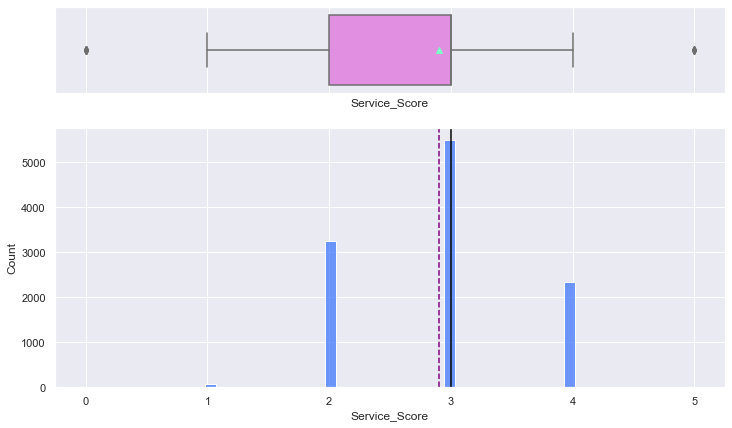

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Service_Score")

- The average satisfaction score given by customers for the service provided is 3
- Outliers at 0 and 5
- In general this gives an idea that customers are not fully satisfied with the service and it is a matter of concern that needs to be inspected

### 8. Account User Count

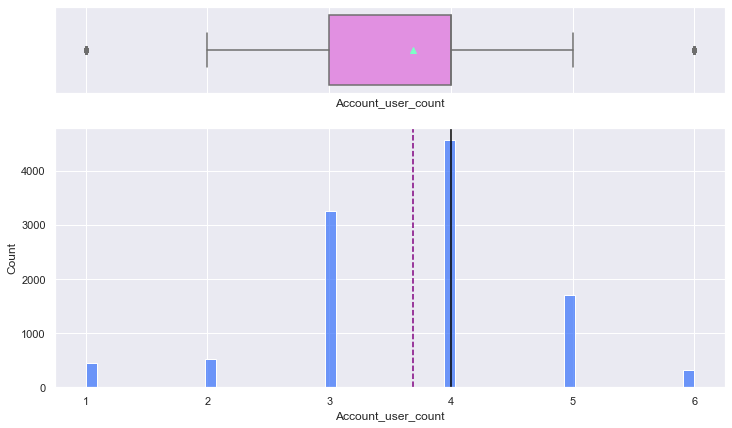

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "Account_user_count")

- Large number of accounts are tagged with 4 customers, followed by 3 and 5 customers per account
- Outliers at 1 and 6 customers per account
- Account_user_count can as well be treated as a categorical variable

### 9. Account Segment

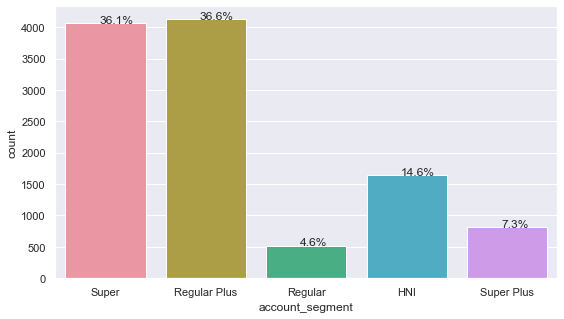

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["account_segment"])
perc_on_bar(ax, data["account_segment"])

- Segments 'Regular Plus' and 'Super' have the maximum of customers above 36% 
- Segment 'Regular' has the least number of customers under 5%
- High Net Income (HNI) segment comprise of 14.6% of customers

### 10. Customer Care Agent Score

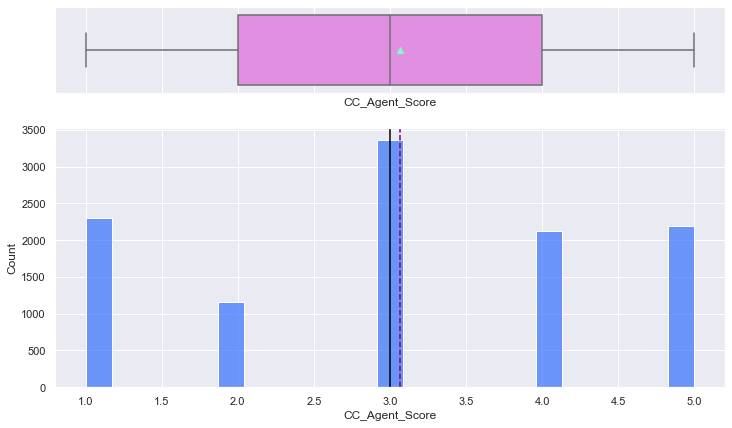

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "CC_Agent_Score")

- On an average the score received for the customer care provided is 3
- It is seen that almost equal number of customers have given excellent scores 4, 5 and a bad score of 1 
- The distribution suggests that the customer service has almost equal chances to be either a hit or a miss 

### 11. Marital Status

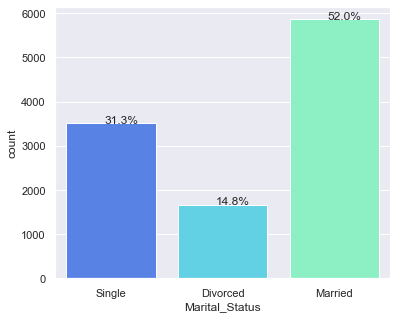

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data["Marital_Status"])
perc_on_bar(ax, data["Marital_Status"])

- 52% of the primary account holders are married, ~31% of them are single and ~15% are divorced customers

### 12. Average Revenue per Month

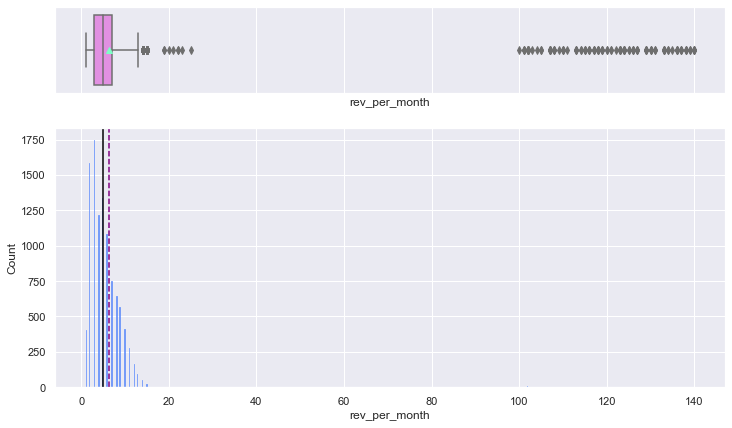

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data, "rev_per_month")

- The currency is in thousands of INR
- The IQR for the average revenue generated by account per month is under 10K
- Highly skewed due to the presence of outiers above 100K

### 13. Complaints raised in the past year

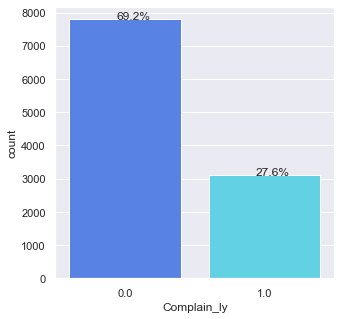

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Complain_ly"])
perc_on_bar(ax, data["Complain_ly"])

- It is a binary data where 0 means a NO and 1 means a YES
- ~28% of the time complaints has been raised in the past year and ~69% of the time it was not
- If recurring / potential complaints are identified, it will be helpful in determining the chances if a customer will churn or not

### 14. Revenue Growth Percentage

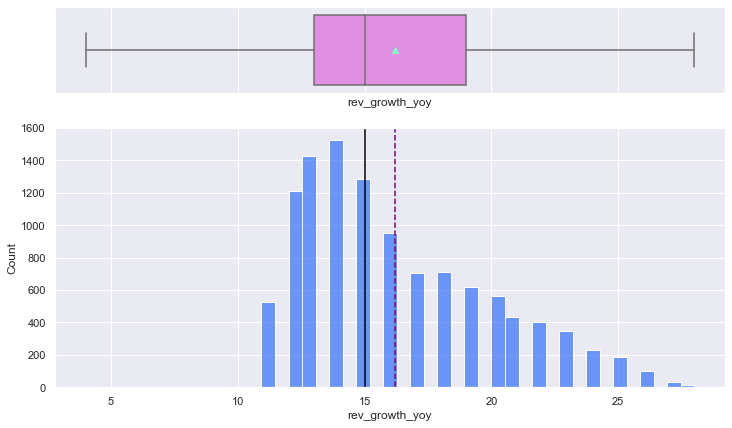

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data, "rev_growth_yoy")

- On an average there is a ~16% growth in revenue generated by the account in the past year compared to its previous year. Although there is scope for improvement, this is still a positive take for the management
- The growth percentage ranges anywhere between ~4% to ~29% 
- The IQR is between ~12% and ~18%

### 15. Coupoun Used for Payment

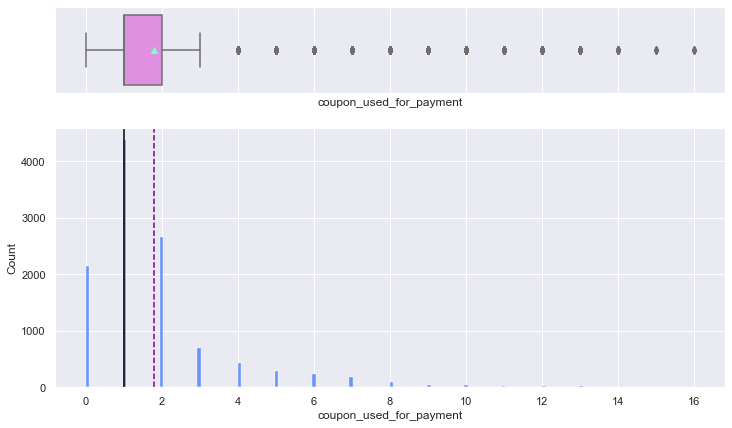

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data, "coupon_used_for_payment")

- On an average coupons were used ~2 times to do the payment in the past year
- Higest number of times coupon was used is 2 followed by none
- Outliers ranging from 4 to 16 times

### 16. Days since Customer Care was contacted

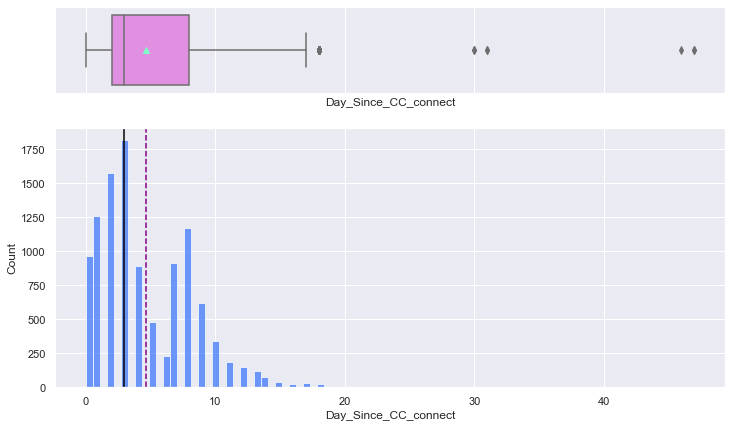

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(data, "Day_Since_CC_connect")

- Higest number of customers reconnect within the first three days of reaching out. Customer service can be improved by tracing the recurring reasons and work towards solving it
- Average number of days taken to reconnect is 5
- The call pattern repeats again around 5 to 6 days
- Three different groups of outliers can be seen around 20, 30 and 50 days

### 17. Cashback

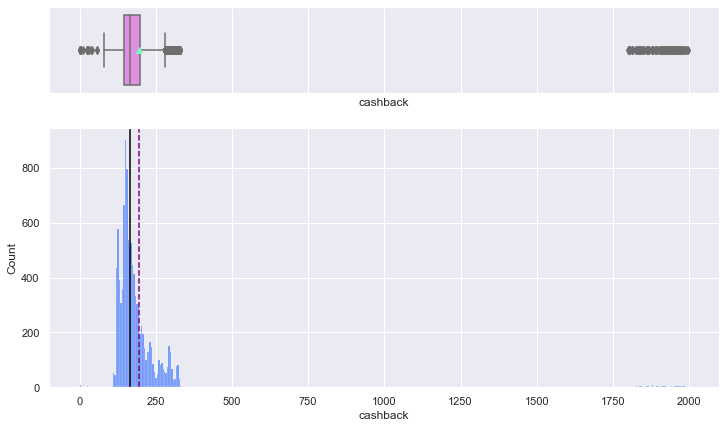

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(data, "cashback")

- On an average, the cashback generated by the account in the past year in about 200 INR
- Outliers present between 1800 and 2000

### 18. Login Device

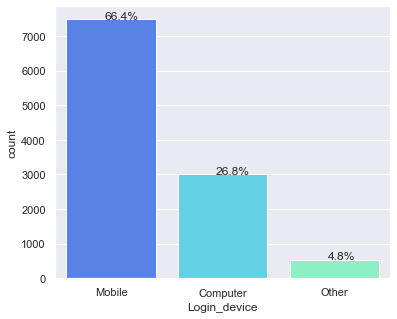

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data["Login_device"])
perc_on_bar(ax, data["Login_device"])

- Mobile is the highest preferred login device with ~67% followed by Computer with ~29%.
- The 'Other' category comprises of ~5%. Possibilities are this category might be Smart TV.

## Bivariate Analysis

In [45]:
# Defining a method to plot stacked bar plot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable
    
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

<IPython.core.display.Javascript object>

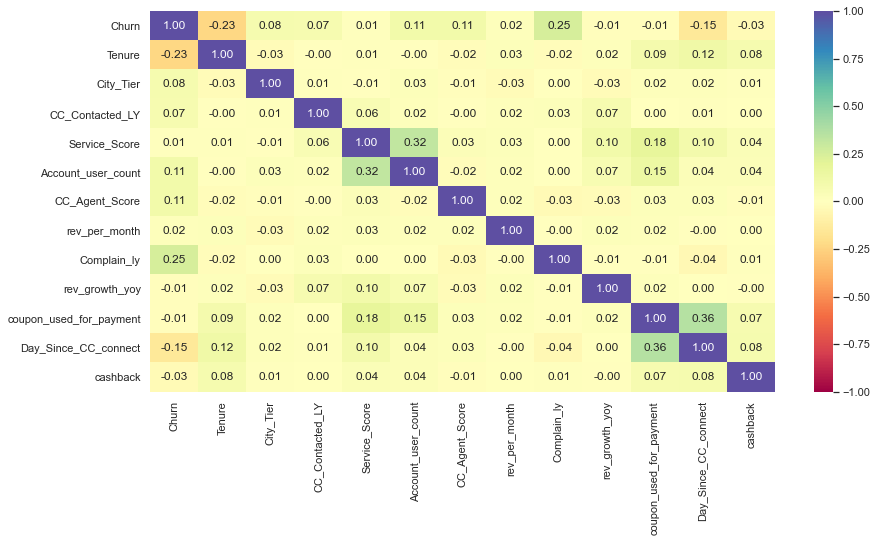

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(14, 7))
sns.heatmap(
    data.drop("AccountID", axis=1).corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

- Churn is in moderate positive correlation with Complain_ly, Account_user_count, CC_Agent_Score and negative correlation with Tenure, Day_Since_CC_connect
- Service_Score is in moderate positive correlation with Account_user_count, coupon_used_for_payment and in weak positive correlation with rev_growth_yoy, Day_Since_CC_connect
- Account_user_count is in moderate positive correlation with Service_Score, coupon_used_for_payment and Churn
- rev_growth_yoy is in weak positive correlation with Service_Score
- coupon_used_for_payment is in moderate positive correlation with Day_Since_CC_connect, Service_Score and Account_user_count
- City_Tier, CC_Contacted_LY, rev_per_month, rev_growth_yoy and cashback are in a weak +ve/-ve correlation with all the other variables
- Overall, there is no strong positive/negative correlation among the variables. 

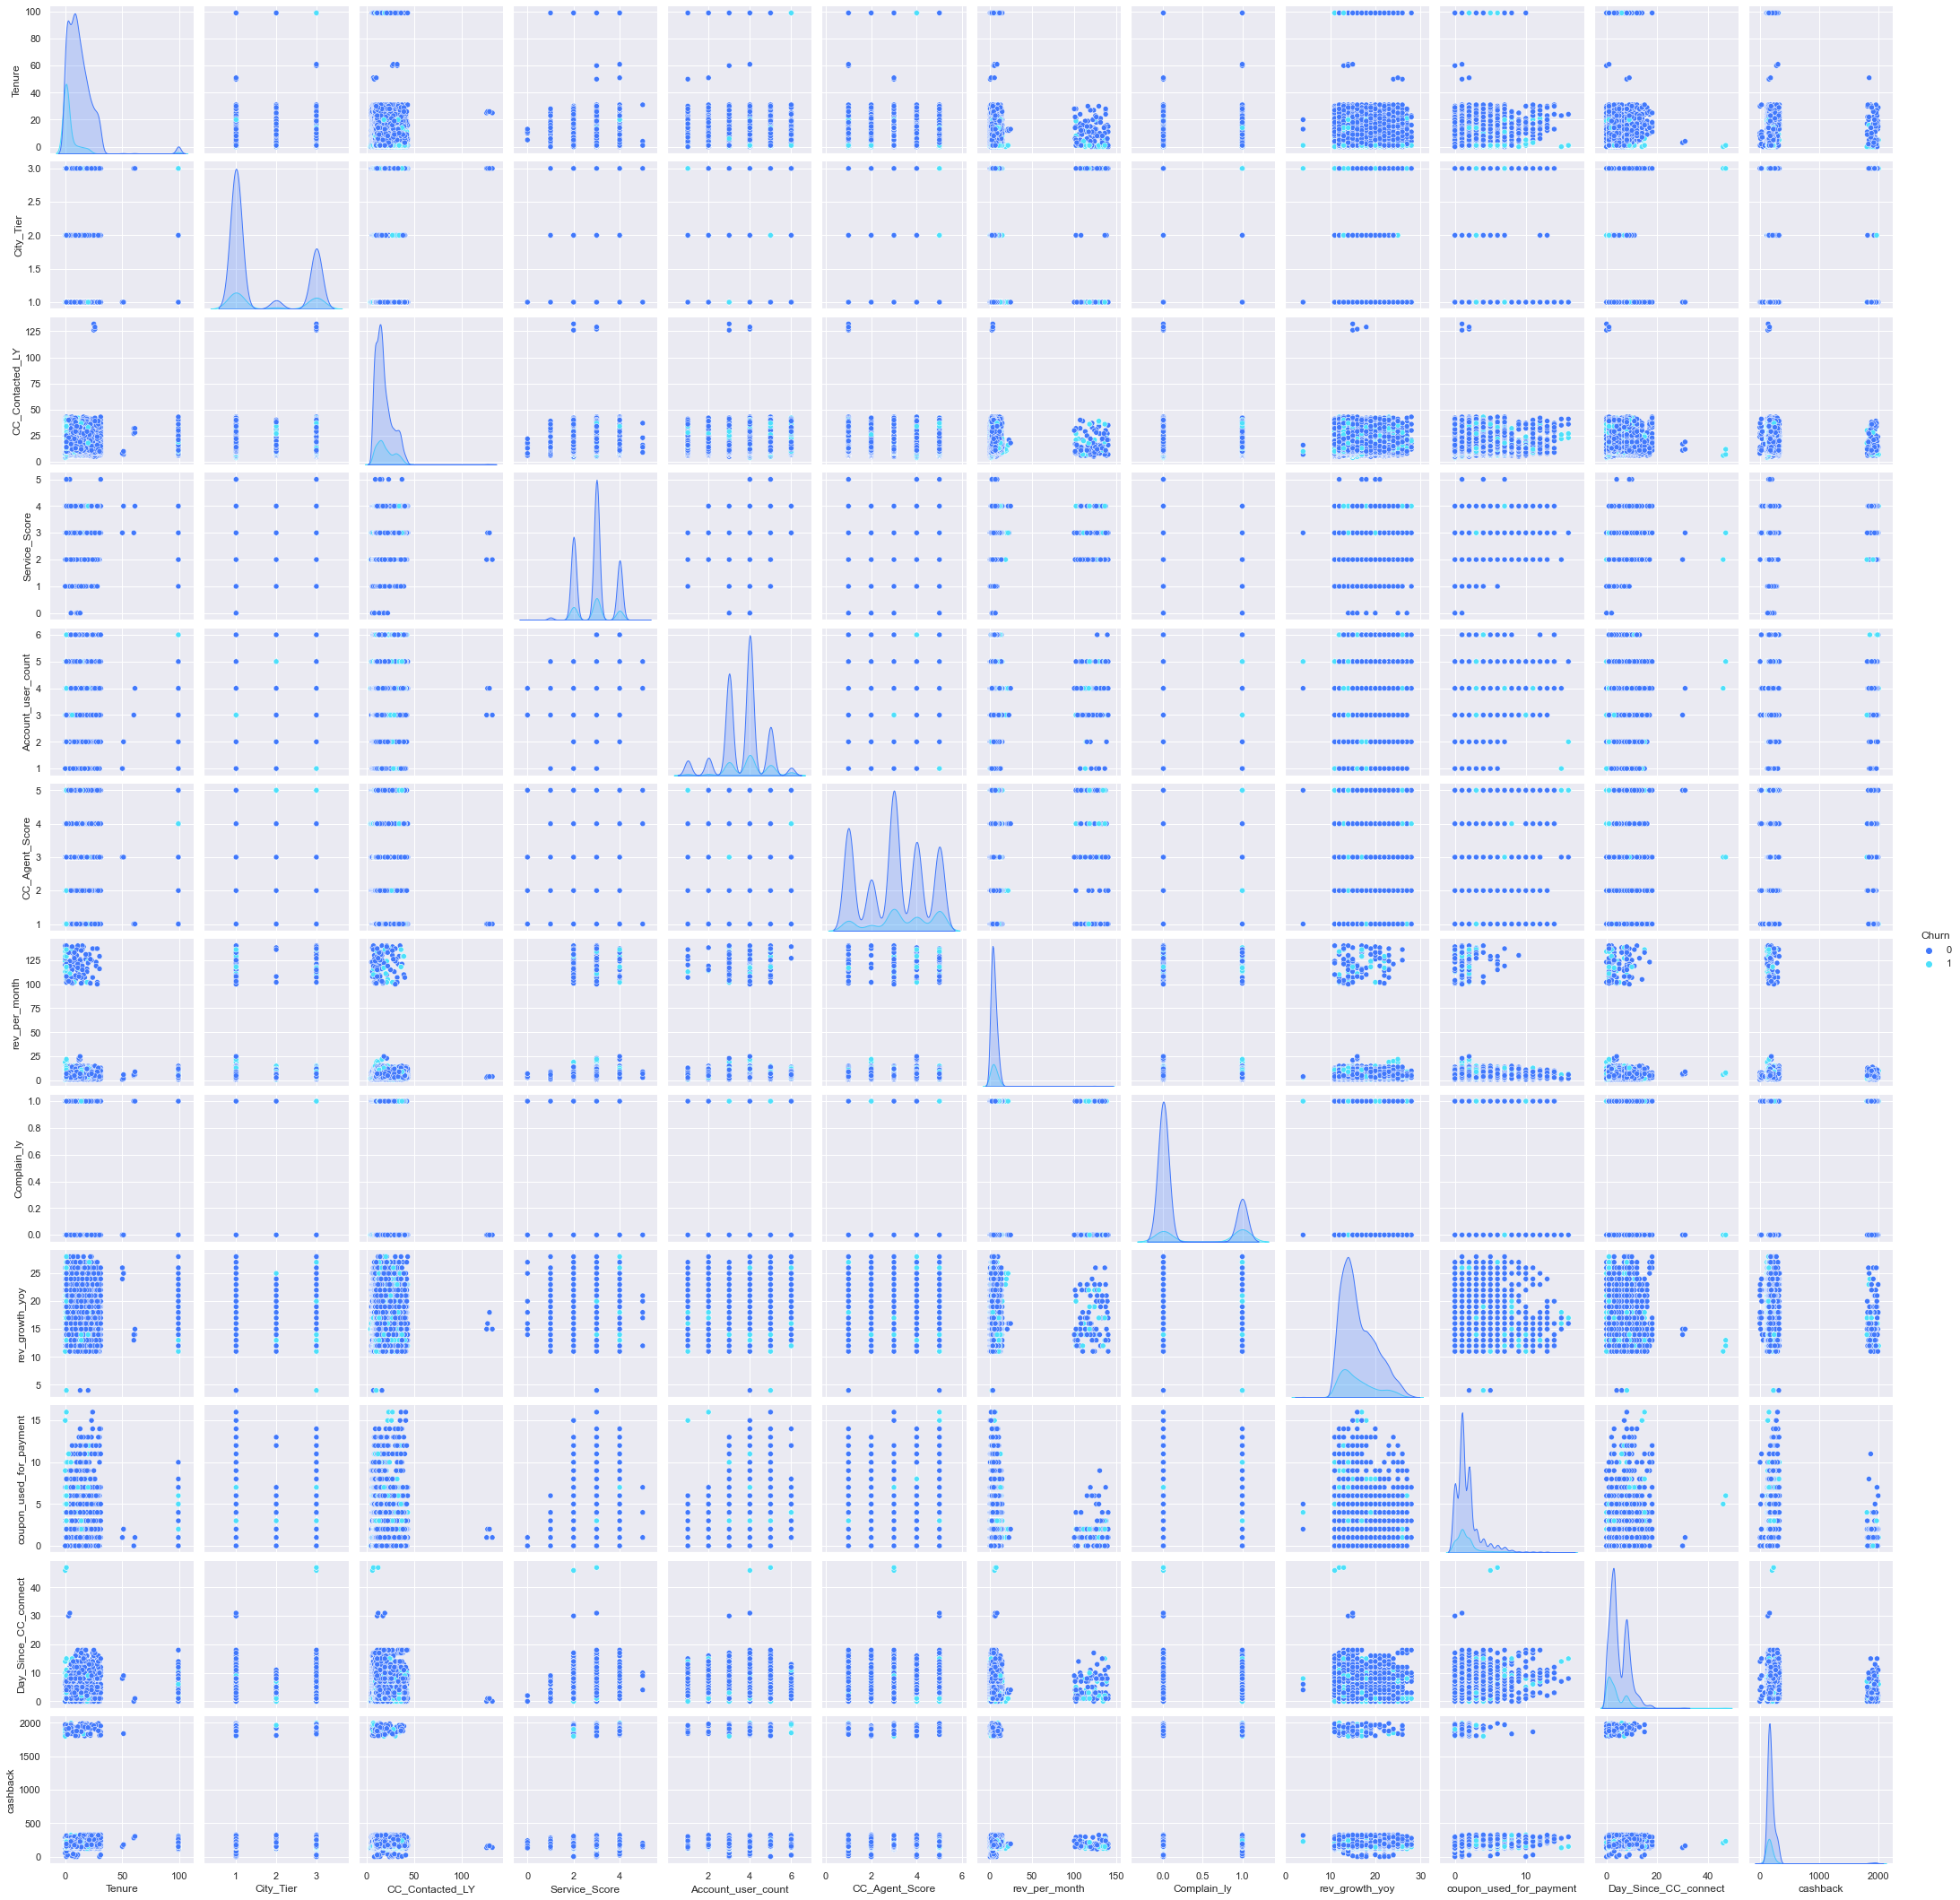

<IPython.core.display.Javascript object>

In [47]:
sns.pairplot(data.drop("AccountID", axis=1), hue="Churn")
plt.show()

- Lower the tenure with the company, higher the chances that a customer will churn
- Customers from city tier 1 and 3 seems to churn more comparatively
- Customers will less number of contacts with the customer care in the past year have churned more in number
- Potential are the customers who have given a service satisfaction scores 3,2 and 4 
- Accounts tagged with 4,3 and 5 customers are customers who have churned
- The customers who have given an agent score of 3 and above show the churn pattern
- Account that generate lower average monthly revenue and average revenue growth percentage (last year vs the previous yaer) are potential to churn
- There is no distinct churn pattern with reference to the complaints received past year
- Lower the number of times coupons were used for payment, higher the chances that the customer will churn
- Customers with lower average monthly cash back and those contacting the customer care frequently have higher chances to churn

### 1. Target vs Tenure

Churn      0     1    All
Tenure                   
All     9194  1848  11042
1.0      681   670   1351
0.0      562   669   1231
3.0      367    43    410
4.0      360    43    403
7.0      418    32    450
2.0      322    32    354
20.0     187    30    217
5.0      373    30    403
8.0      490    29    519
10.0     396    27    423
14.0     320    25    345
13.0     334    25    359
99.0     107    24    131
19.0     249    24    273
9.0      475    21    496
15.0     291    20    311
21.0     150    20    170
11.0     368    20    388
16.0     272    19    291
6.0      348    15    363
12.0     347    13    360
18.0     242    11    253
17.0     209     6    215
30.0     137     0    137
61.0       2     0      2
60.0       2     0      2
51.0       2     0      2
50.0       2     0      2
31.0      96     0     96
26.0     122     0    122
29.0     114     0    114
28.0     137     0    137
27.0     131     0    131
25.0     114     0    114
24.0     147     0    147
22.0     151

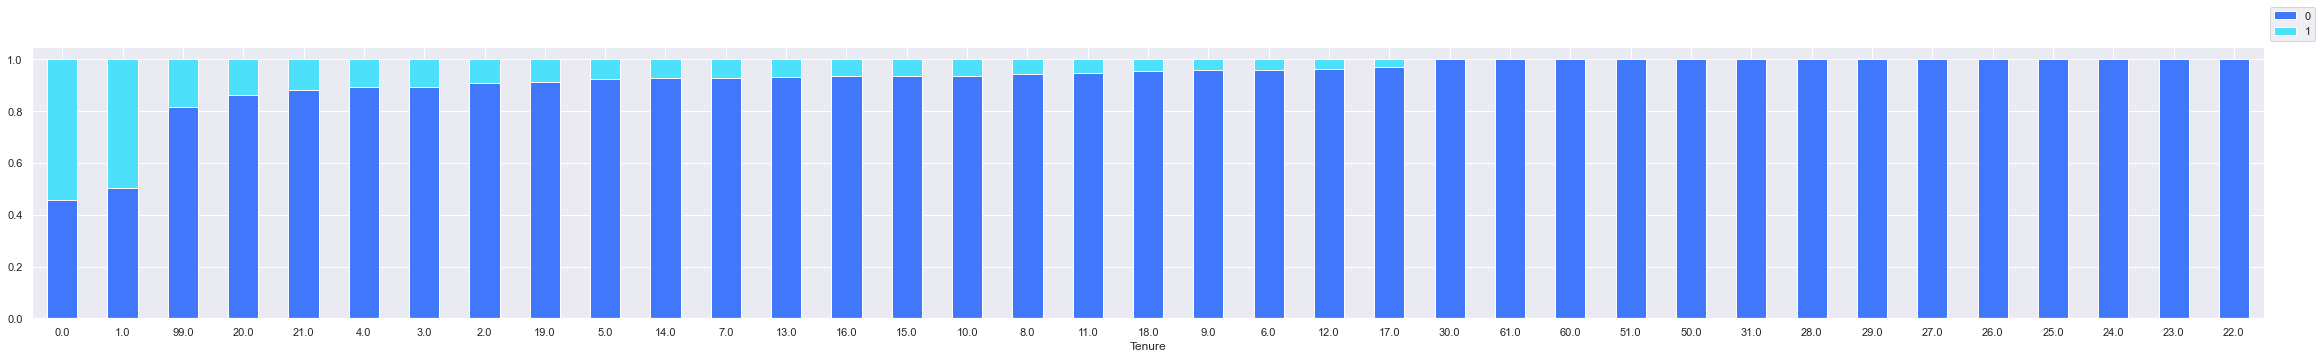

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "Tenure", "Churn")

- It can be seen that lower the tenure (especially 1 month or less), higher the chances for the customer to churn
- Hence, relevant steps need to be taken to retain new customers 
- There is absolutely no churning among customers with tenure between 22 to 61 months

### 2. Target vs City_Tier

Churn         0     1    All
City_Tier                   
All        9269  1879  11148
1.0        6207  1056   7263
3.0        2678   727   3405
2.0         384    96    480


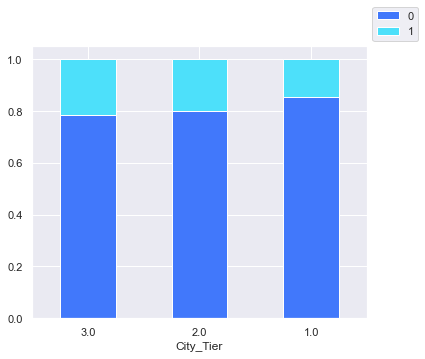

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "City_Tier", "Churn")

- Tier3 customer have churned more, followed by tier2 and tier1 cities
- Although tier2 customer are very less in number comparatively, they churn a lot.

### 3. Target vs Customer Care Contacted (Past year)

Churn               0     1    All
CC_Contacted_LY                   
All              9280  1878  11158
16.0              554   109    663
14.0              580   102    682
15.0              528    95    623
13.0              561    94    655
9.0               567    88    655
12.0              483    88    571
17.0              442    83    525
10.0              415    74    489
11.0              452    72    524
8.0               469    69    538
18.0              306    68    374
19.0              299    65    364
21.0              251    59    310
22.0              227    55    282
20.0              265    54    319
7.0               338    53    391
31.0              113    52    165
30.0              128    47    175
23.0              197    44    241
29.0              138    43    181
24.0              172    42    214
6.0               270    41    311
32.0              152    40    192
34.0              139    39    178
28.0              142    36    178
25.0              16

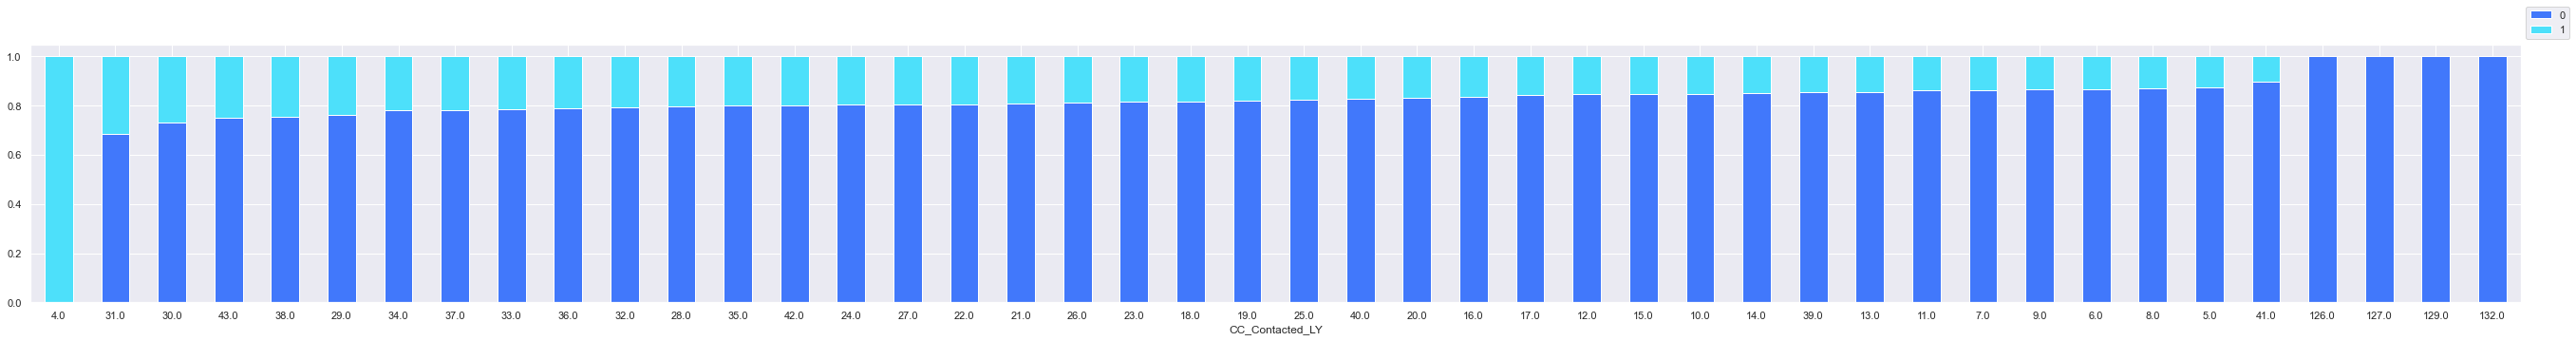

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "CC_Contacted_LY", "Churn")

- Only one customer has contacted customer care only 4 times or above 100 times in the past year and has attrited. We cannot conclude anything as this was the case with only one customer.
- 100+ calls to the customer care needs further inspection to decide if thery are outliers or data entry errors
- It can be suggested that higher the number of times the customer care is contacted, higher is the attrition rate. 

### 4. Target vs Payment

Churn                0     1    All
Payment                            
All               9277  1874  11151
Debit Card        3885   702   4587
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822


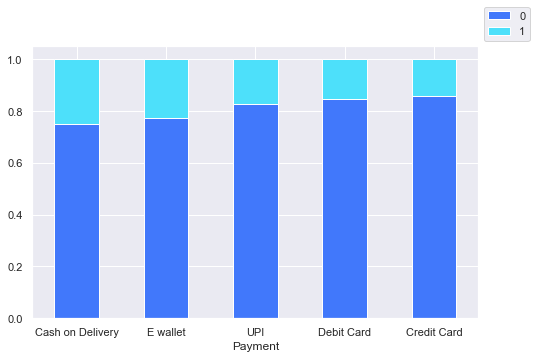

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "Payment", "Churn")

- Customers who prefer Cash on Delivery and E-wallet are their payment mode churn more
- UPI, Debit card and Credit card payment methods show almost similar pattern

### 5. Target vs Gender

Churn      0     1    All
Gender                   
All     9278  1874  11152
Male    5519  1185   6704
Female  3759   689   4448


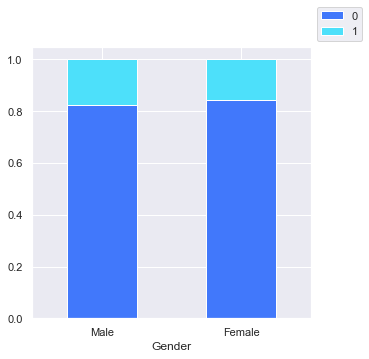

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "Gender", "Churn")

- Male customers show slightly more attrition rate. This can be attributed to the case that there are more number of Male customers than Female customers

### 6. Target vs Service Score

Churn             0     1    All
Service_Score                   
All            9282  1880  11162
3.0            4554   936   5490
2.0            2701   550   3251
4.0            1937   394   2331
0.0               8     0      8
1.0              77     0     77
5.0               5     0      5


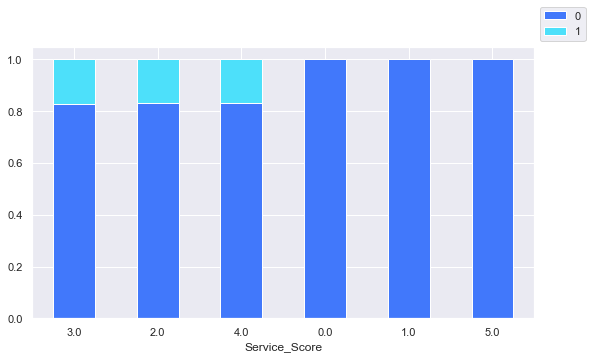

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "Service_Score", "Churn")

- As seen above, customers who have given a satisfaction score of 2, 3 and 4 have attrited more
- It is interesting to see that customers who have given very bad scores of 1 or below have chosen to stay

### 7. Target vs Account user count

Churn                  0     1    All
Account_user_count                   
All                 8986  1830  10816
4.0                 3811   758   4569
3.0                 2772   489   3261
5.0                 1317   382   1699
6.0                  206   109    315
2.0                  478    48    526
1.0                  402    44    446


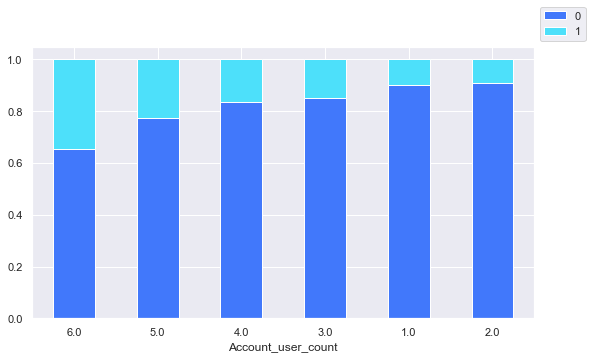

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "Account_user_count", "Churn")

- Higher the number of tagged customer per account, higher the chances that the customer will churn

### 8. Target vs Account segment

Churn               0     1    All
account_segment                   
All              9285  1878  11163
Regular Plus     2997  1127   4124
Super            3646   416   4062
HNI              1384   255   1639
Regular           480    40    520
Super Plus        778    40    818


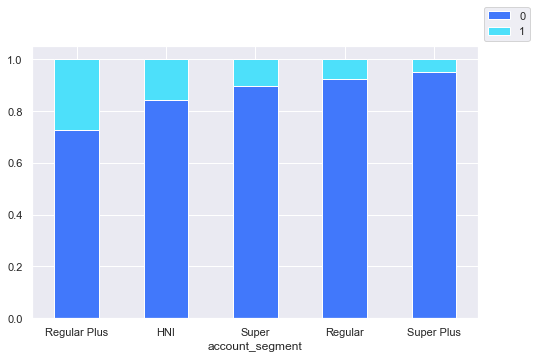

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "account_segment", "Churn")

- Regular Plus show higher churn rate followed by HNI and Super segments

### 9. Target vs Customer Care Agent Score

Churn              0     1    All
CC_Agent_Score                   
All             9270  1874  11144
3.0             2783   577   3360
5.0             1669   522   2191
4.0             1763   364   2127
1.0             2038   264   2302
2.0             1017   147   1164


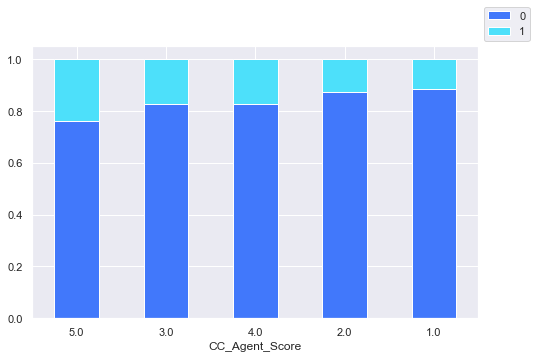

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(data, "CC_Agent_Score", "Churn")

- High churn rate among customers who have given a customer care agent score of 3 or more

### 10. Target vs Marital Status

Churn              0     1    All
Marital_Status                   
All             9184  1864  11048
Single          2573   947   3520
Married         5187   673   5860
Divorced        1424   244   1668


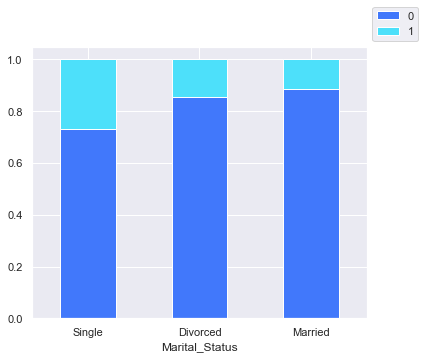

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(data, "Marital_Status", "Churn")

- Single customers show higher churn rate followed by Divorced and Married customers

### 11. Target vs Average Revenue per Month

Churn             0     1    All
rev_per_month                   
All            8694  1775  10469
3.0            1447   299   1746
2.0            1315   270   1585
5.0            1139   198   1337
6.0             899   186   1085
4.0            1048   170   1218
7.0             602   152    754
8.0             523   120    643
9.0             465    99    564
10.0            341    72    413
11.0            215    63    278
1.0             354    48    402
12.0            129    37    166
13.0             76    17     93
15.0             15     9     24
14.0             40     8     48
118.0             1     3      4
102.0             5     3      8
19.0              0     2      2
136.0             2     2      4
134.0             0     2      2
129.0             2     2      4
124.0             3     2      5
138.0             2     1      3
127.0             2     1      3
110.0             2     1      3
117.0             2     1      3
114.0             1     1      2
113.0     

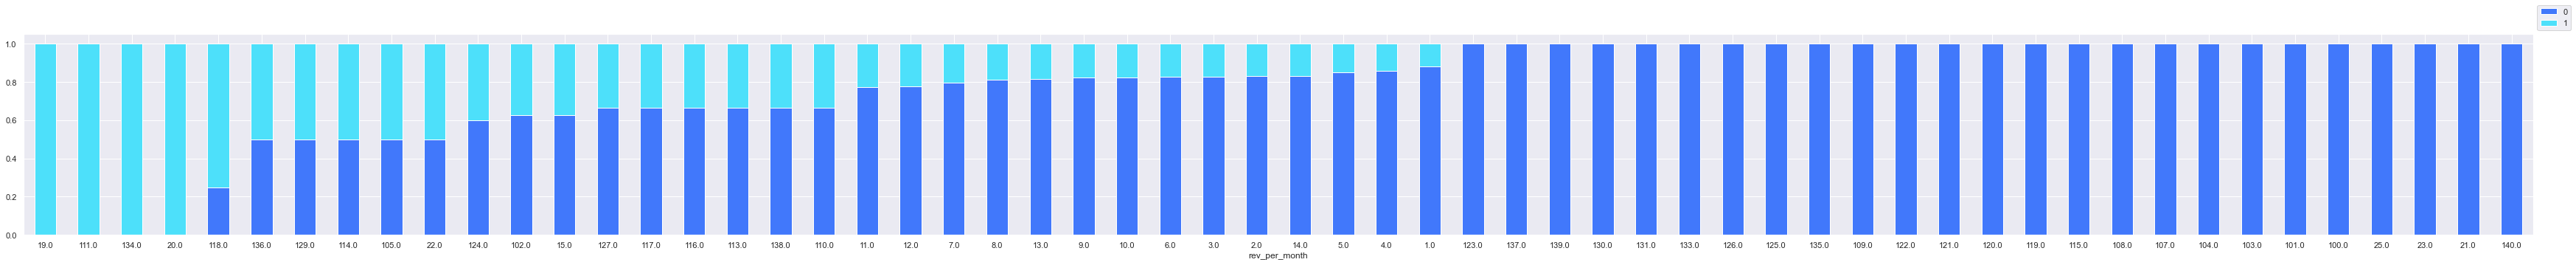

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "rev_per_month", "Churn")

- Accounts that generated an average monthly income between 3K to 9K have shown higher attrition rate comparatively

### 12. Target vs Complain_ly

Churn           0     1    All
Complain_ly                   
All          9065  1838  10903
1.0          2123   988   3111
0.0          6942   850   7792


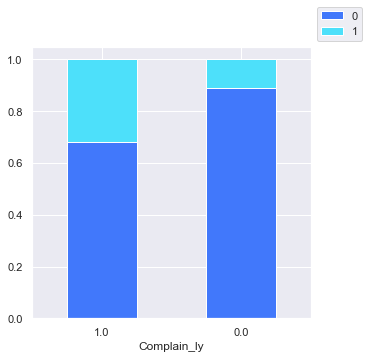

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "Complain_ly", "Churn")

- Customers who raised a complaint in the past year have churned
- It is importane for the service/customer care teams to act promptly to address the complaint and also do a followup to make sure that the issue was resolved in order to reatin the customers

### 13. Target vs rev_growth_yoy

Churn              0     1    All
rev_growth_yoy                   
All             9361  1896  11257
13.0            1157   270   1427
14.0            1283   241   1524
12.0             985   225   1210
15.0            1105   178   1283
16.0             782   167    949
17.0             574   130    704
18.0             593   115    708
11.0             418   105    523
19.0             533    86    619
20.0             486    76    562
23.0             275    70    345
22.0             337    66    403
21.0             378    55    433
24.0             177    52    229
25.0             145    43    188
26.0              89     9     98
27.0              29     6     35
28.0              13     1     14
4.0                2     1      3


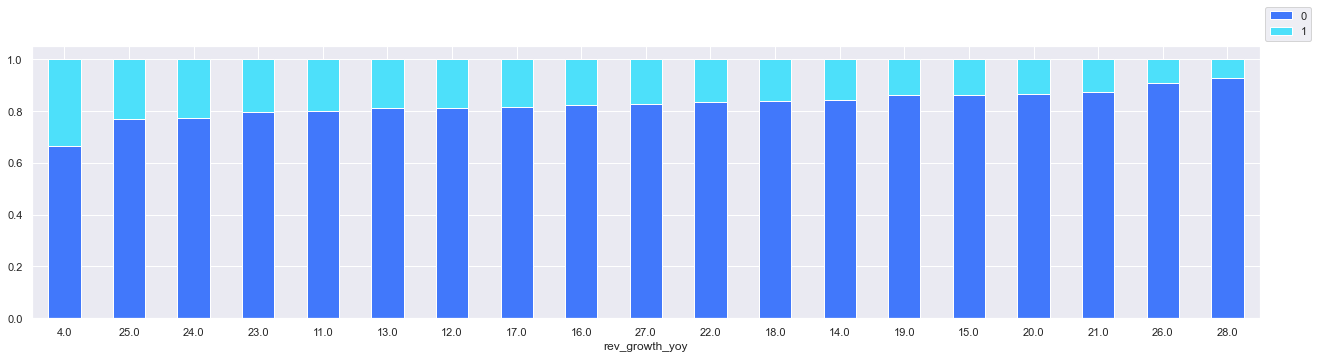

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(data, "rev_growth_yoy", "Churn")

- On an average, accounts with lower revenue growth percentage in the past year compared to the previous year have quit the services

### 14. Target vs coupon_used_for_payment

Churn                       0     1    All
coupon_used_for_payment                   
All                      9361  1896  11257
1.0                      3613   760   4373
2.0                      2210   446   2656
0.0                      1776   374   2150
3.0                       602    96    698
4.0                       362    62    424
5.0                       238    46    284
6.0                       198    36    234
7.0                       148    36    184
8.0                        68    20     88
10.0                       28     6     34
11.0                       26     4     30
9.0                        30     4     34
12.0                       24     2     26
15.0                        2     2      4
16.0                        2     2      4
13.0                       22     0     22
14.0                       12     0     12


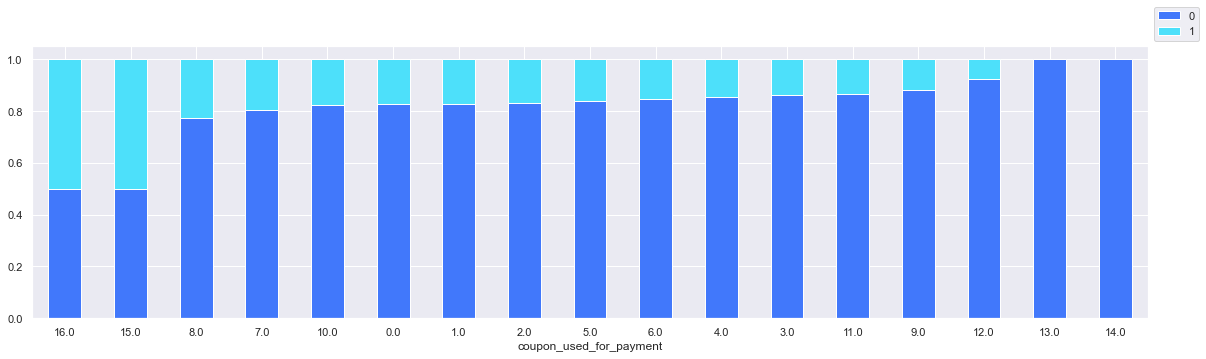

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(data, "coupon_used_for_payment", "Churn")

- Only two customers have used coupons highest number of times (15 or 16) for payment and they both have churned
- On an average, customers who used coupons for payment only 2 times or less, show higher attrition rate

### 15. Target vs Day_Since_CC_connect

Churn                    0     1    All
Day_Since_CC_connect                   
All                   9070  1832  10902
1.0                    880   376   1256
0.0                    638   326    964
3.0                   1551   265   1816
2.0                   1339   235   1574
8.0                   1012   157   1169
7.0                    776   135    911
4.0                    777   116    893
9.0                    558    64    622
5.0                    424    55    479
10.0                   305    34    339
6.0                    197    32    229
11.0                   167    16    183
14.0                    66     8     74
15.0                    30     7     37
12.0                   143     3    146
47.0                     0     2      2
46.0                     0     1      1
16.0                    26     0     26
17.0                    34     0     34
18.0                    26     0     26
30.0                     2     0      2
31.0                     2     0      2


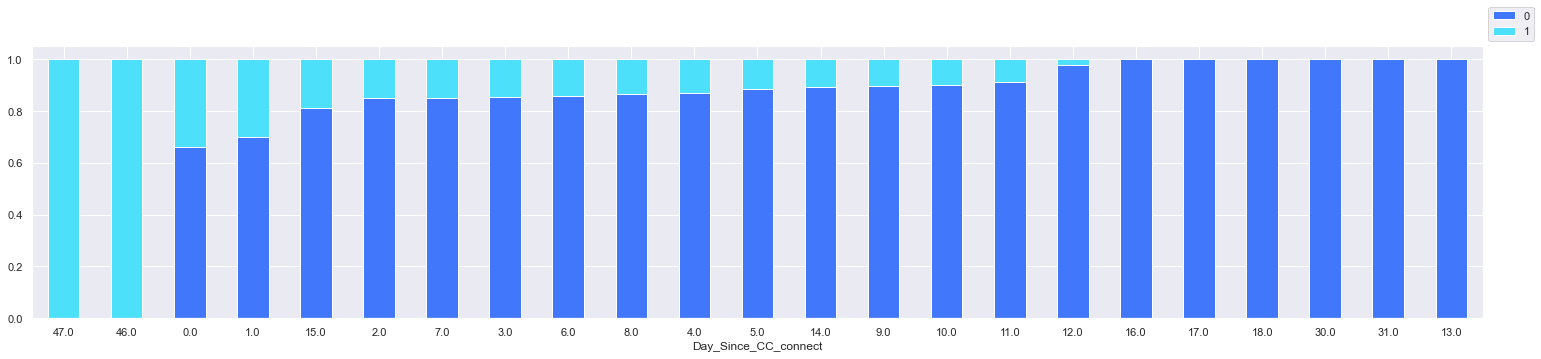

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(data, "Day_Since_CC_connect", "Churn")

- On an average, customers who contacted the customer care frequently show higher attrition rate
- Only about 2 customers have contacted the CC after about six weeks or so and have churned

### 16. Target vs cashback

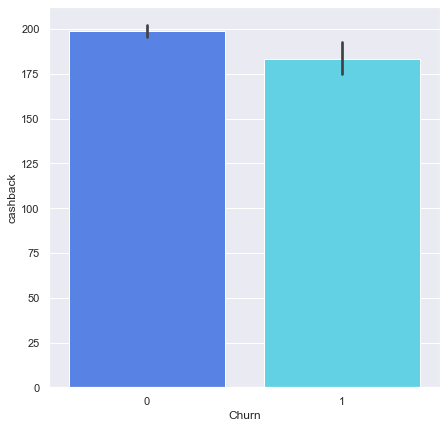

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(7, 7))
sns.barplot(y="cashback", x="Churn", data=data)
plt.show()

- In general, higher the chances for customers receiving very little cashback to churn

### 17. Target vs Login Device

Churn            0     1    All
Login_device                   
All           9185  1854  11039
Mobile        6310  1172   7482
Computer      2421   597   3018
Other          454    85    539


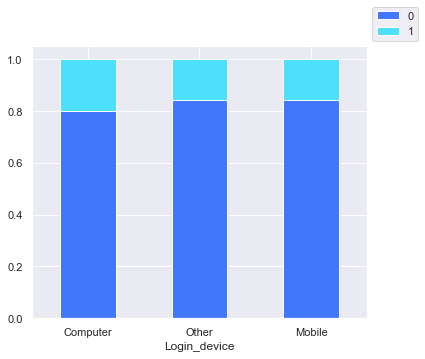

<IPython.core.display.Javascript object>

In [64]:
stacked_barplot(data, "Login_device", "Churn")

- Customers using Computers as the login device show higher percentage of attrition comparatively

### Characteristics of customers that have churned

In [65]:
# statistical summary of customers who have churned

data[data["Churn"] == 1].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,1896.00,NaN,NaN,NaN,25560.58,3257.05,20000.00,22812.75,25625.50,28438.25,31251.00
Churn,1896.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,1848.00,NaN,NaN,NaN,4.33,12.07,0.00,0.00,1.00,3.00,99.00
City_Tier,1879.00,NaN,NaN,NaN,1.82,0.96,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,1878.00,NaN,NaN,NaN,19.29,8.91,4.00,12.00,17.00,26.00,43.00
Payment,1874,5,Debit Card,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1874,2,Male,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,1880.00,NaN,NaN,NaN,2.92,0.70,2.00,2.00,3.00,3.00,4.00
Account_user_count,1830.00,NaN,NaN,NaN,3.94,1.02,1.00,3.00,4.00,5.00,6.00
account_segment,1878,5,Regular Plus,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

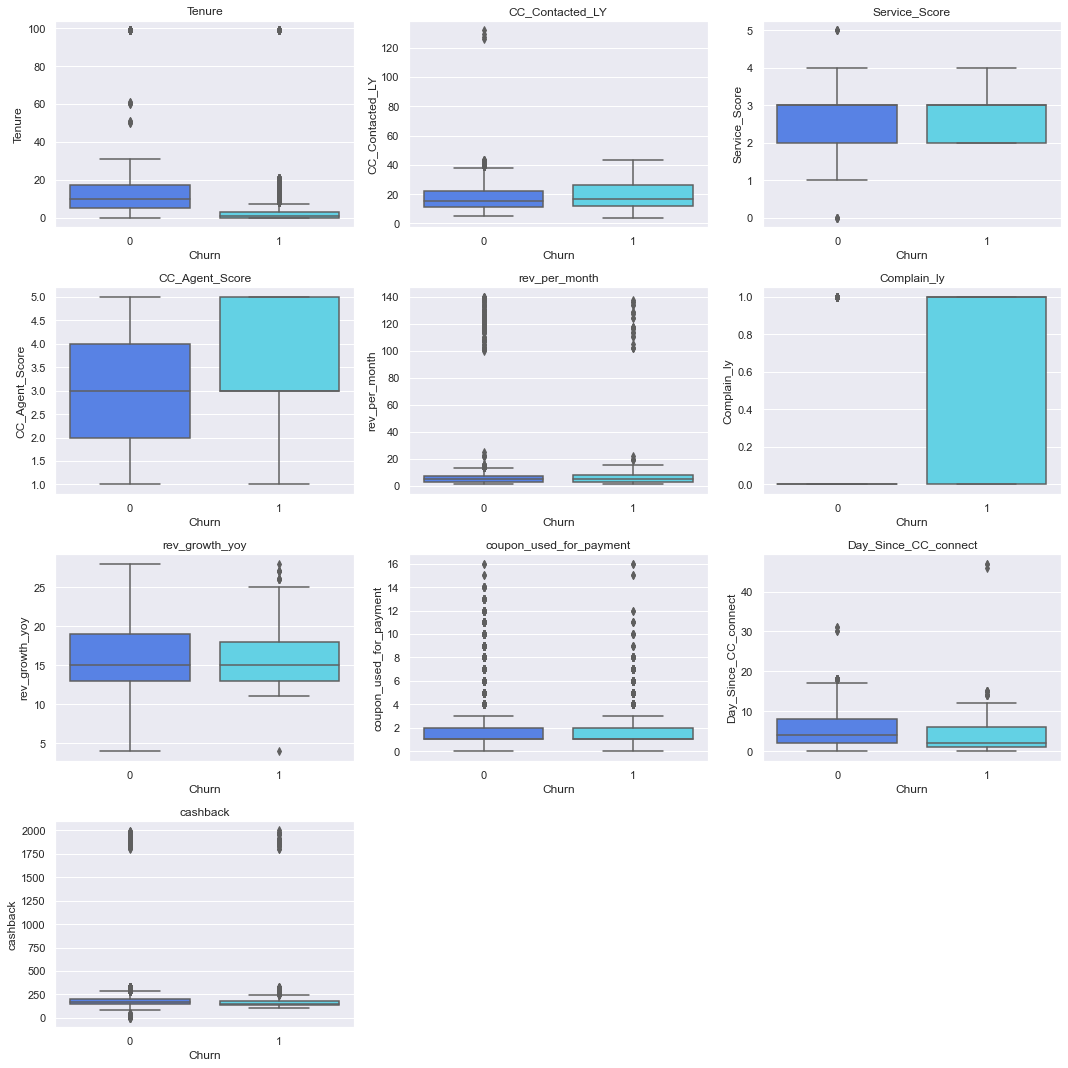

<IPython.core.display.Javascript object>

In [66]:
cont_col = data[
    [
        "Tenure",
        "CC_Contacted_LY",
        "Service_Score",
        "CC_Agent_Score",
        "rev_per_month",
        "Complain_ly",
        "rev_growth_yoy",
        "coupon_used_for_payment",
        "Day_Since_CC_connect",
        "cashback",
    ]
]

plt.figure(figsize=(15, 15))
for i, variable in enumerate(cont_col):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data["Churn"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- `Tenure` - Customers with tenure less than ~5 months i.e., typically new customers tend to attrite more
- `CC_Contacted_LY` - Customers who have contacted the customer care more number of times (~19 times) in the past year have attrited more comparatively
- `Payment` - Customers using Debit Card have higher chances to churn. This may be attributed to the fact that most customers prefer to make payments with Debit Card
- `Gender` - Male customers have attrited more
- `Service_Score` - Higher the chances for customers who give a satisfaction score of either 2 or 3, to churn
- `Account_user_count` - On an average, accounts that are tagged with ~4 customers have churned
- `account_segment` - Regular Plus customers have attrited more
- `CC_Agent_Score` - Customers who gave an agent score of 3 and above have attrited more. 
- The above scores suggest that customers are pretty satisfied with the customer service provided but not the DTH service provided by the company. The management must take steps to provide better DTH services to it's customers.
- `Marital_Status` - More number of Single customers have churned in comparison
- `rev_per_month` - There is no varying pattern with respect to customer attrition
- `Complain_ly` - It is evident that if a complaint were to be raised, there are higher chances of the customer attriting
- `rev_growth_yoy` - On an average, if the growth percentage of the account in the past year to that of the previous year is less (under ~16%), chances are that the customer will churn
- `coupon_used_for_payment` - On an average, customers who used coupons for payment under 2 times, in the past year have attrited
- `Day_Since_CC_connect` - Customers who contacted the customer care frequently attrited more
- `cashback` - On an average, customers who received very little cashback (under Rs.200)have attrited
- `Login_device` - Customers who prefered Mobile to login, have churned more

## Key Insights from EDA

### Churning is more common among:

#### Accounts:
- with tenure less than ~5 months (i.e new customers)
- Regular Plus account holders
- with lower revenue growth percentage in the past year in comparison to the previous year
- that generated an average monthly cashback under 200 INR

#### Customers:

- from City Tier1 followed by City Tier3
- who preferred Debit Card to make payments and Mobile to login
- who contacted the customer care on an average of ~19 times in the past year
- who are Male and Single
- who gave a service satisfaction score of 3 or less and an agentscore score of 3 or more
- who raised a complain in the past year 
- who used coupons for payment less than 2 times

## Removal of unwanted variables

In [67]:
# Making a copy of the dataset before removing any variable

data1 = data.copy()

# Dropping AccountID column as it an all unique feature

data.drop("AccountID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [68]:
# Checking the number of columns in the dataset

data.shape

(11260, 18)

<IPython.core.display.Javascript object>

## Distribution of Target w.r.t Independent variables

In [69]:
# Defining a method to plot distributions with respect to the target variable


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target, for target = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0, 0]
    )

    axs[0, 1].set_title("Distribution of target, for target = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]], x=predictor, kde=True, ax=axs[0, 1]
    )

    axs[1, 0].set_title("Boxplot (with outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### 1. Churn vs Tenure

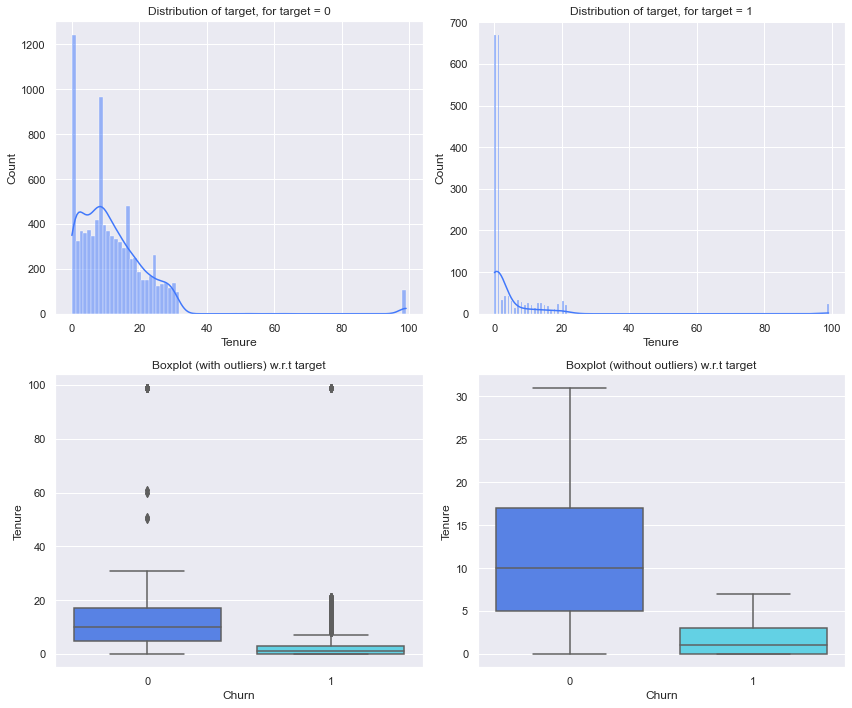

<IPython.core.display.Javascript object>

In [70]:
distribution_plot_wrt_target(data, "Tenure", "Churn")

- Customers with lower Tenure are the ones who attrited more i.e., typically new customers

### 2. Churn vs City_Tier

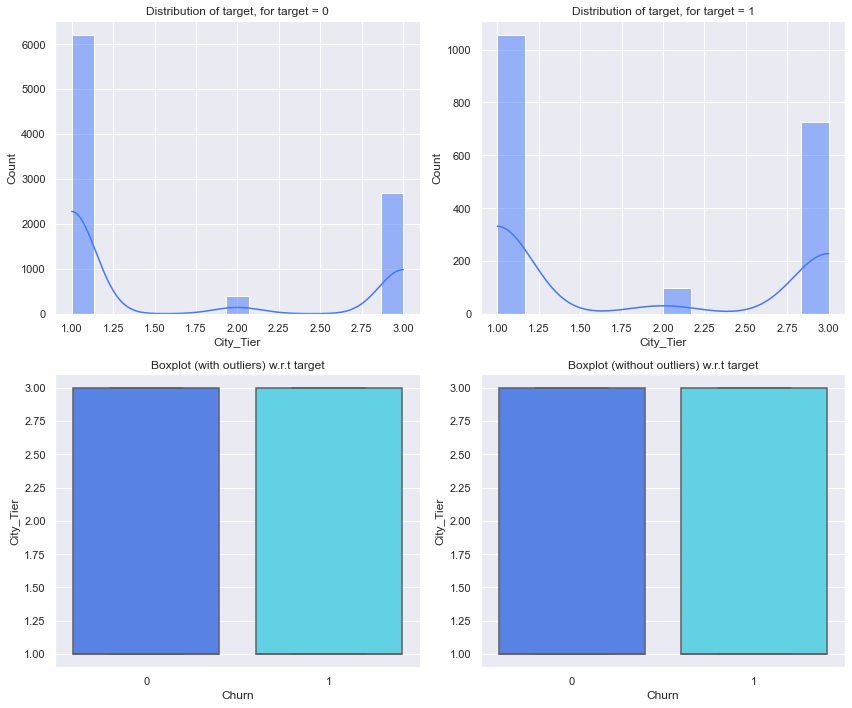

<IPython.core.display.Javascript object>

In [71]:
distribution_plot_wrt_target(data, "City_Tier", "Churn")

- There's not much difference in the distribution between attrited and non-attrited customer w.r.t City Tier

### 3. Churn vs CC_Contacted_LY

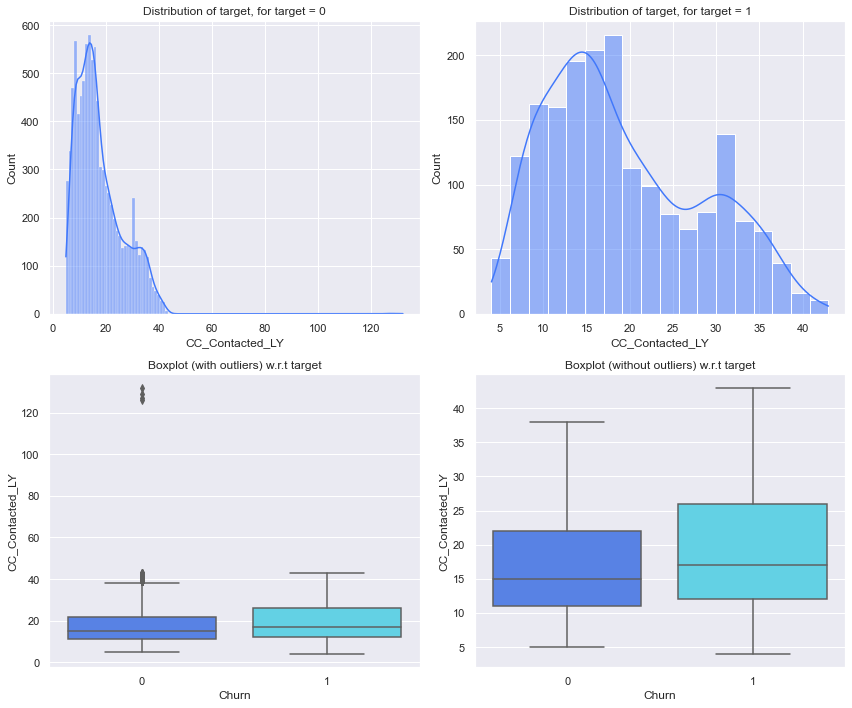

<IPython.core.display.Javascript object>

In [72]:
distribution_plot_wrt_target(data, "CC_Contacted_LY", "Churn")

- If the customer care is contacted anywhere between 12 to 27 times a year, higher the chances for the customer to attrite

### 4. Churn vs Service_Score

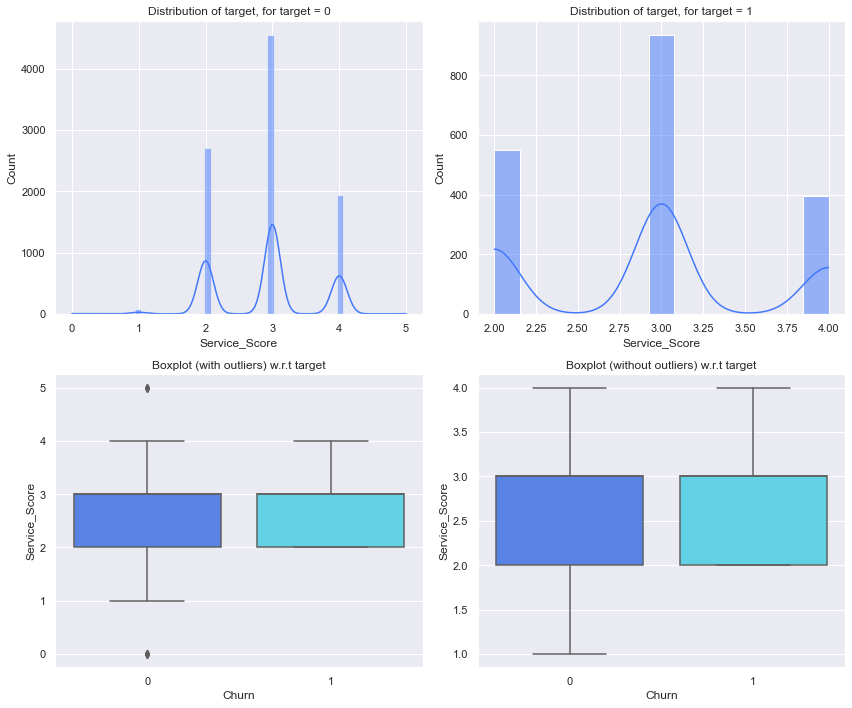

<IPython.core.display.Javascript object>

In [73]:
distribution_plot_wrt_target(data, "Service_Score", "Churn")

- Customers who gave a service score of 2,3 or 4 are the ones who attrited

### 5. Churn vs Account_user_count

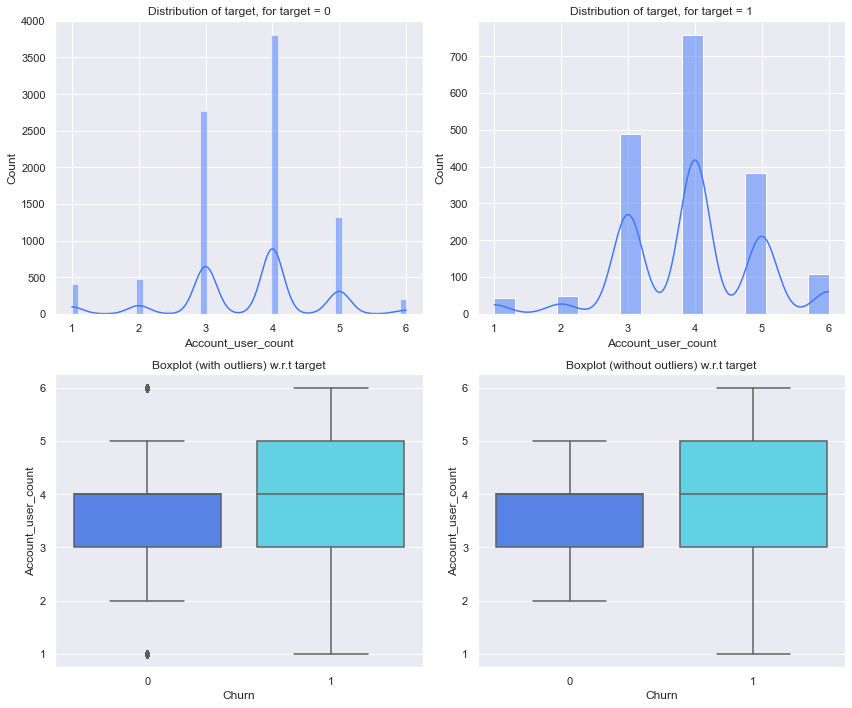

<IPython.core.display.Javascript object>

In [74]:
distribution_plot_wrt_target(data, "Account_user_count", "Churn")

- Attrition is higher among customers with 3 or more users tagged with the account

### 6. Churn vs CC_Agent_Score

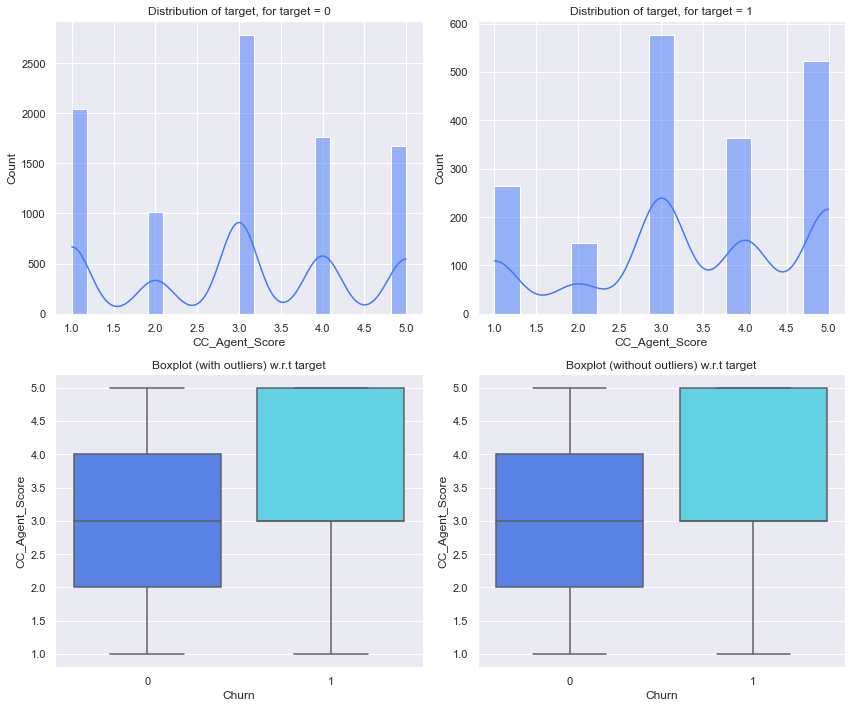

<IPython.core.display.Javascript object>

In [75]:
distribution_plot_wrt_target(data, "CC_Agent_Score", "Churn")

- Attrition is higher among customers who have given an agent score of 3 or more

### 7. Churn vs rev_per_month

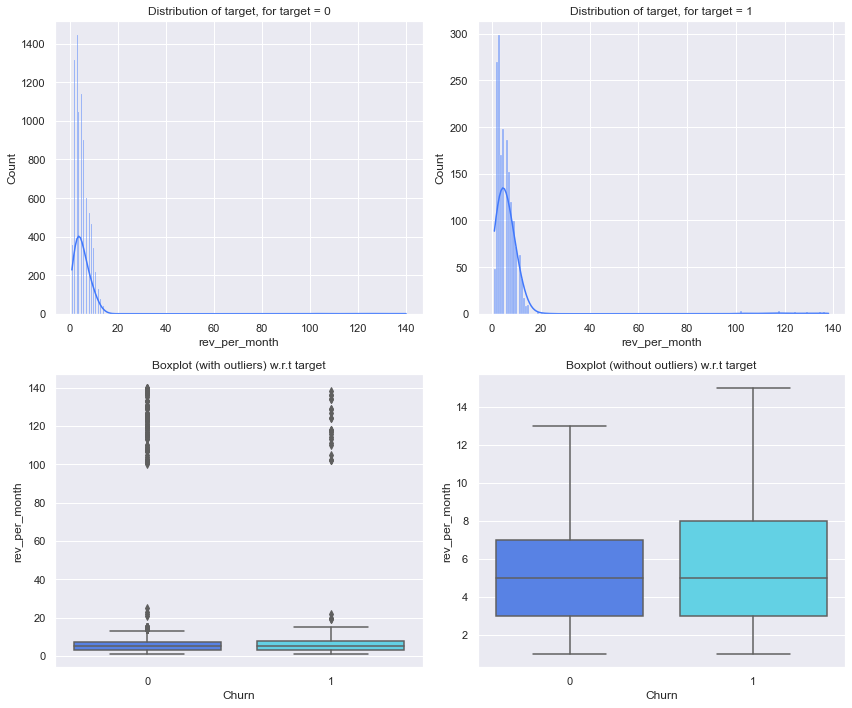

<IPython.core.display.Javascript object>

In [76]:
distribution_plot_wrt_target(data, "rev_per_month", "Churn")

- Customers with accounts generating lower average revenue per month tend to churn more

### 8. Churn vs Complain_ly

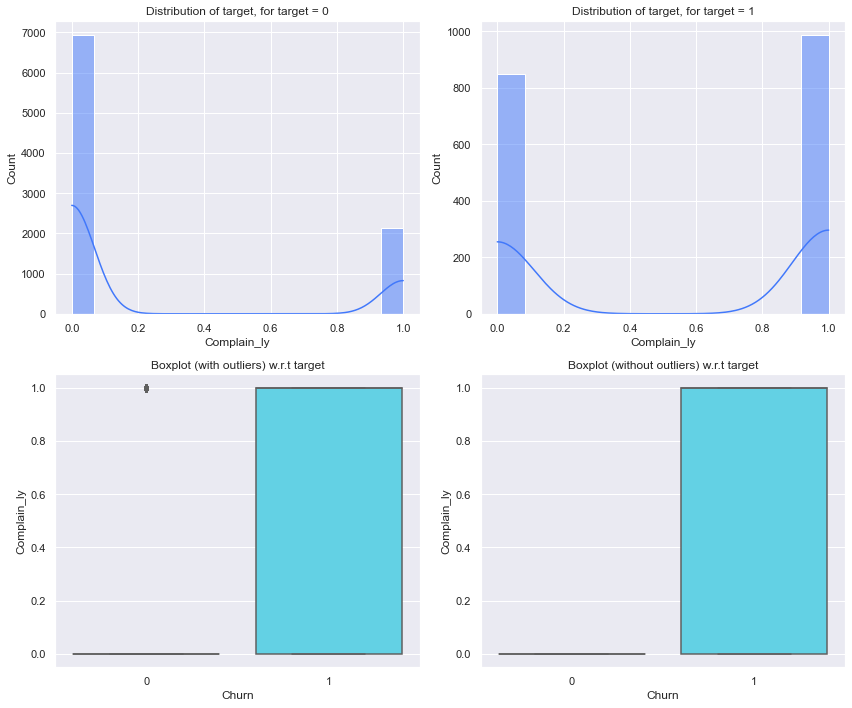

<IPython.core.display.Javascript object>

In [77]:
distribution_plot_wrt_target(data, "Complain_ly", "Churn")

- Higher are the chances for the customers who raise raised a complain to attrite in comparison to those who did not

### 9. Churn vs rev_growth_yoy

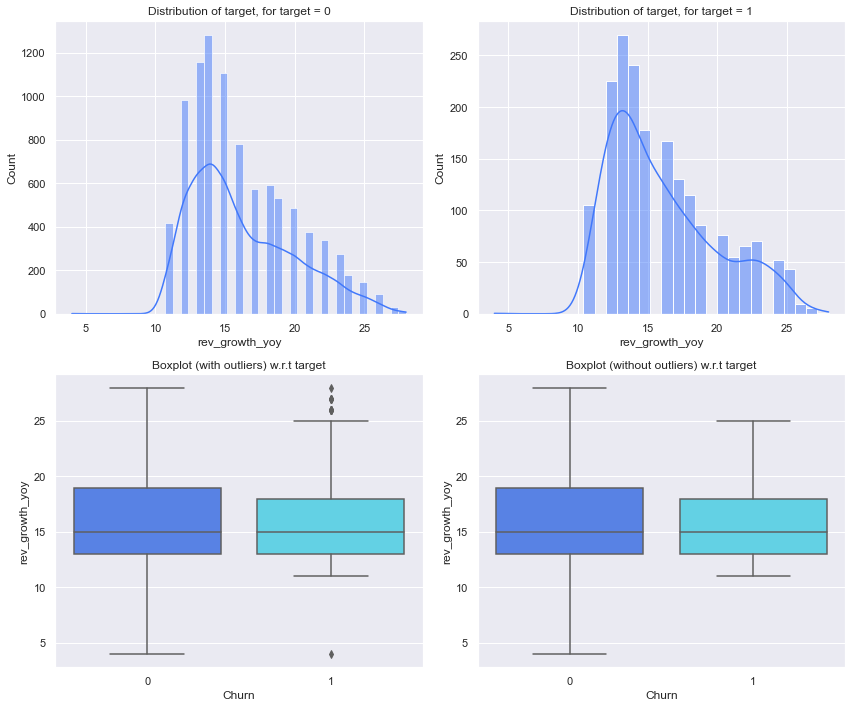

<IPython.core.display.Javascript object>

In [78]:
distribution_plot_wrt_target(data, "rev_growth_yoy", "Churn")

- Lower the revenue growth percentage in the past year in comparison to the previous year, higher the chances for the customer to churn

### 10. Churn vs coupon_used_for_payment

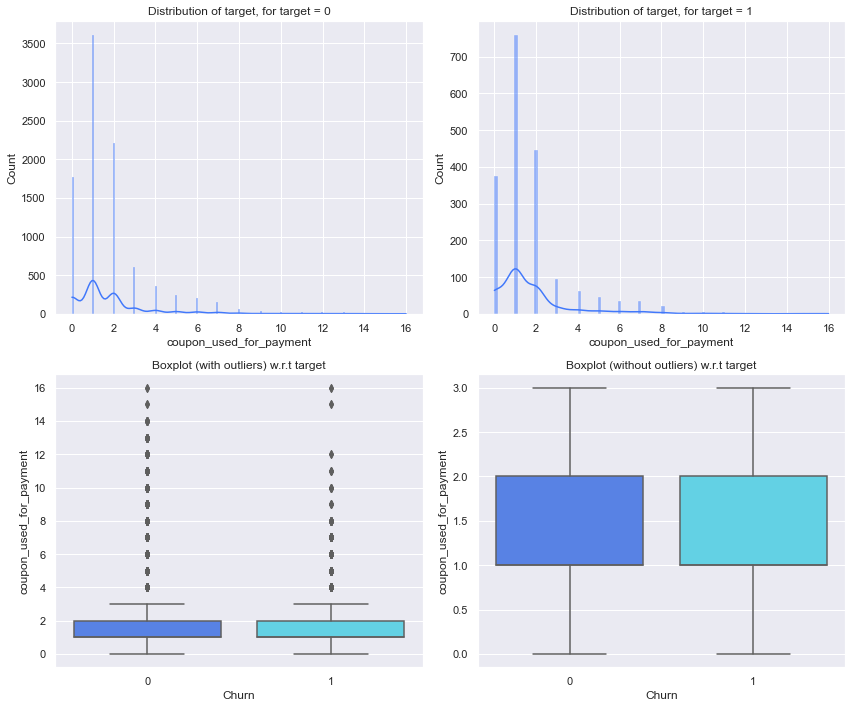

<IPython.core.display.Javascript object>

In [79]:
distribution_plot_wrt_target(data, "coupon_used_for_payment", "Churn")

- There's not much difference in the distribution between attrited and non-attrited customer w.r.t the number of coupons used for payment

### 11. Churn vs Day_Since_CC_connect

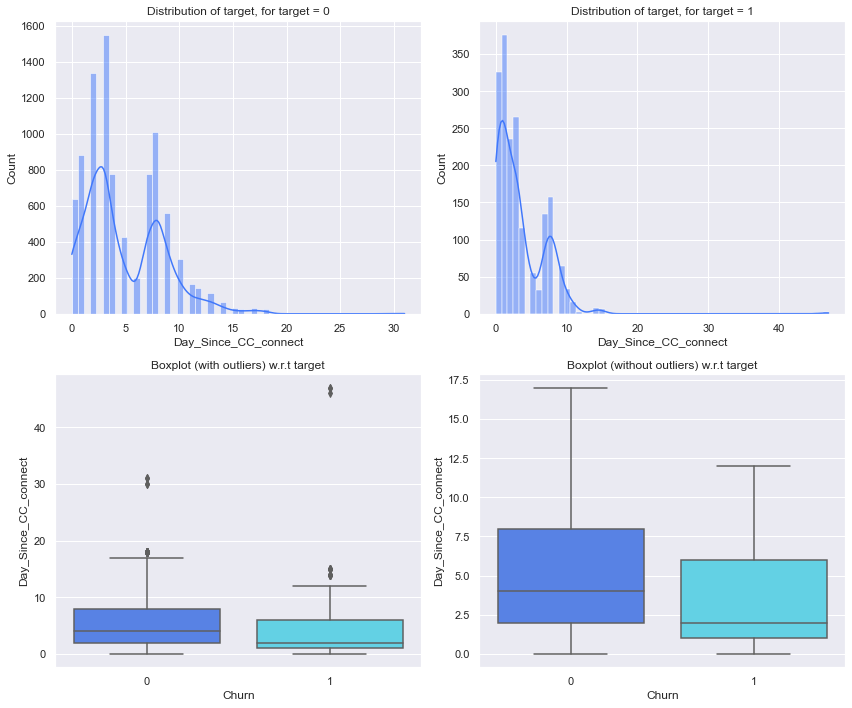

<IPython.core.display.Javascript object>

In [80]:
distribution_plot_wrt_target(data, "Day_Since_CC_connect", "Churn")

- Users who reached out to the customer care within a week are at a higher risk to churn

### 12. Churn vs cashback

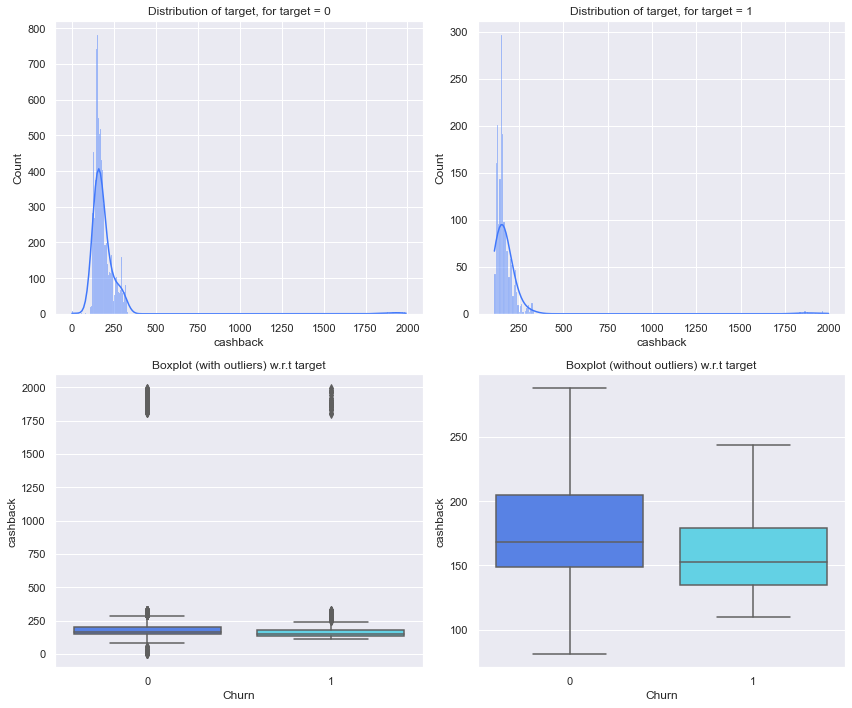

<IPython.core.display.Javascript object>

In [81]:
distribution_plot_wrt_target(data, "cashback", "Churn")

- Attrition is higher among customers with monthly average cashback under 200INR

### 13. Churn vs Tenure vs Gender

<Figure size 360x216 with 0 Axes>

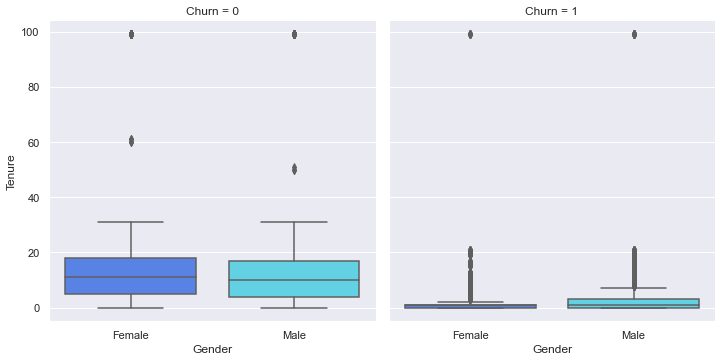

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(5, 3))
sns.catplot(x="Gender", y="Tenure", col="Churn", data=data, kind="box")
plt.show()

- For lower Tenure, the churn rate is higher with Male customers in comparison to Female customers

### 14. Churn vs Day_Since_CC_connect vs Gender

<Figure size 360x216 with 0 Axes>

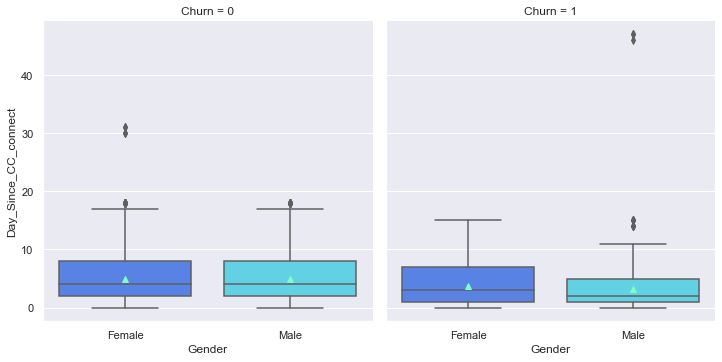

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(5, 3))
sns.catplot(
    x="Gender",
    y="Day_Since_CC_connect",
    col="Churn",
    data=data,
    kind="box",
    showmeans=True,
)
plt.show()

- Male customers who call much more frequently than the Female customers churn more

### 15. Churn vs Marital_Status vs Gender

<Figure size 360x216 with 0 Axes>

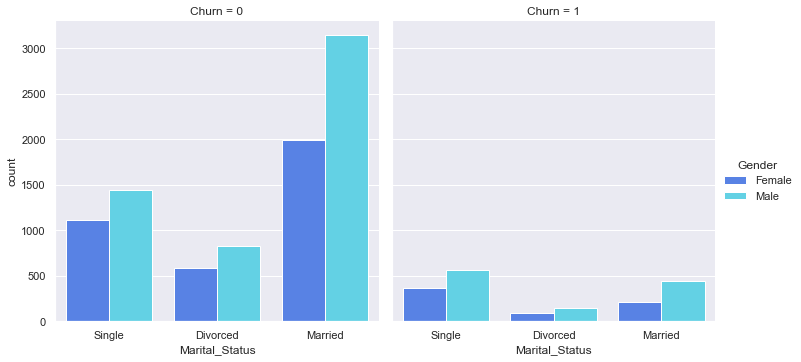

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(5, 3))
sns.catplot(data=data, x="Marital_Status", hue="Gender", kind="count", col="Churn")
plt.show()

- It can be seen that churn rate is higher among Male customers irrespective of their Marital_Status in comparison to Female customers

### 16. Churn vs Payment vs Gender

<Figure size 360x216 with 0 Axes>

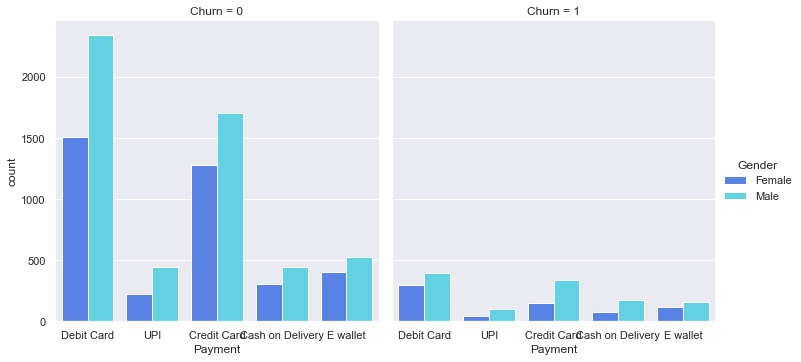

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(5, 3))
sns.catplot(data=data, x="Payment", hue="Gender", kind="count", col="Churn")
plt.show()

- Male customers have churned more than Female customers across different payment methods

### 17. Churn vs account_segment vs Gender

<Figure size 360x216 with 0 Axes>

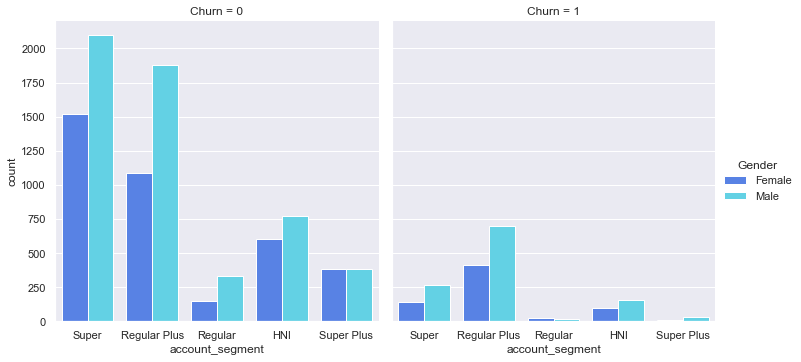

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(5, 3))
sns.catplot(data=data, x="account_segment", hue="Gender", kind="count", col="Churn")
plt.show()

- For account segment 'Regular' Female customers churn more than Male customers
- For all other account segments Male customers show higher attrition rate

### 18. Churn vs Login_device vs Gender

<Figure size 360x216 with 0 Axes>

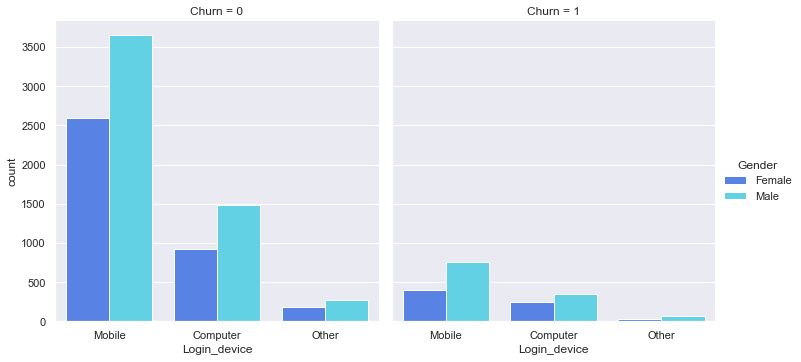

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(5, 3))
sns.catplot(data=data, x="Login_device", hue="Gender", kind="count", col="Churn")
plt.show()

- Male customers churn more than Female customers irrespective of the preferred login device

### 19. Churn vs Account_user_count vs Service_Score

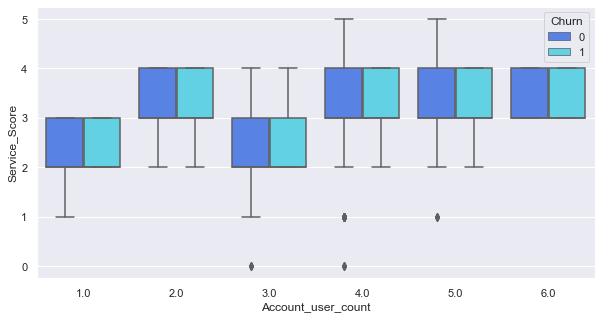

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Account_user_count", y="Service_Score", hue="Churn")
plt.show()

- The churn pattern across Account_user_count varies with Service_Score given by the customer

## Building profiles of churned customers w.r.t different account segments

- These profiles can help us to categorize customers and provide segmented offers to potential churners

In [89]:
data[(data["account_segment"] == "Regular") & (data["Churn"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,40.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,39.00,NaN,NaN,NaN,20.33,23.79,4.00,8.00,16.00,20.00,99.00
City_Tier,39.00,NaN,NaN,NaN,1.82,1.00,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,40.00,NaN,NaN,NaN,12.95,4.86,8.00,9.00,12.50,15.25,25.00
Payment,40,4,E wallet,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,40,2,Female,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,40.00,NaN,NaN,NaN,2.90,0.71,2.00,2.00,3.00,3.00,4.00
Account_user_count,40.00,NaN,NaN,NaN,4.30,1.11,3.00,3.00,4.00,5.00,6.00
account_segment,40,1,Regular,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,40.00,NaN,NaN,NaN,3.50,1.22,1.00,3.00,4.00,4.00,5.00


<IPython.core.display.Javascript object>

- a total of 40 churned customers
- with a Tenure IQR of **4 to 20 months**

- largely from **Tier1 and Tier3** cities
- average of 13 customer care contacts past year ; **minimum 4**

- mostly **Female customers who preferred E-wallet** payment
- mostly **Single and used Mobile** to login
- service score of 2 to 4
- **average** 
    - users per account : **4**
    - complain : **0.6**
    - coupons used : **3 to 4**
    - cashback : **Rs.308**
    
- reached out to customer care within **4 to 12 days**  

In [90]:
data[(data["account_segment"] == "Regular Plus") & (data["Churn"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,1127.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,1097.00,NaN,NaN,NaN,2.80,10.14,0.00,0.00,1.00,1.00,99.00
City_Tier,1117.00,NaN,NaN,NaN,1.51,0.83,1.00,1.00,1.00,2.00,3.00
CC_Contacted_LY,1117.00,NaN,NaN,NaN,18.14,8.35,4.00,12.00,16.00,24.00,43.00
Payment,1112,5,Debit Card,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1115,2,Male,702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,1117.00,NaN,NaN,NaN,2.90,0.70,2.00,2.00,3.00,3.00,4.00
Account_user_count,1085.00,NaN,NaN,NaN,3.94,1.00,1.00,3.00,4.00,5.00,6.00
account_segment,1127,1,Regular Plus,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,1115.00,NaN,NaN,NaN,3.43,1.33,1.00,3.00,3.00,5.00,5.00


<IPython.core.display.Javascript object>

- a total of **1127 churned customers**

- with a Tenure IQR of **1 month or less**

- largely from **Tier1** cities
- average of 18 customer care contacts past year ; **minimum 4**
- mostly **Male customers who preferred Debit Card** payment
- mostly **Single and used Mobile** to login
- service score of 2 to 4
- **average** 
    - users per account : 3 to 4
    - complain : **0.6**
    - coupons used : **1 to 2**
    
    - **cashback : Rs.160**
    
- reached out to customer care within **0 to 15 days**  

In [91]:
data[(data["account_segment"] == "Super") & (data["Churn"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,416.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,406.00,NaN,NaN,NaN,4.79,14.16,0.00,0.00,1.00,3.00,99.00
City_Tier,412.00,NaN,NaN,NaN,2.42,0.91,1.00,1.00,3.00,3.00,3.00
CC_Contacted_LY,412.00,NaN,NaN,NaN,21.51,9.57,6.00,14.00,20.00,29.00,43.00
Payment,411,5,Debit Card,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,408,2,Male,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,411.00,NaN,NaN,NaN,2.96,0.71,2.00,2.00,3.00,3.00,4.00
Account_user_count,401.00,NaN,NaN,NaN,3.97,1.03,1.00,3.00,4.00,5.00,6.00
account_segment,416,1,Super,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,410.00,NaN,NaN,NaN,3.38,1.27,1.00,3.00,3.00,5.00,5.00


<IPython.core.display.Javascript object>

- a total of **416 churned customers**

- with a Tenure IQR of **3 months or less**

- largely from **Tier1 and Tier3** cities
- average of 21 customer care contacts past year ; **minimum 6**

- mostly **Male customers who preferred Debit Card** payment
- mostly **Single and used Mobile** to login
- service score of 2 to 4
- **average** 
    - users per account : 3 to 4
    - complain : **0.5**
    
    - coupons used : **1 to 2**
    
    - cashback : **Rs.206**
    
- reached out to customer care within **0 to 7 days** 

In [92]:
data[(data["account_segment"] == "Super Plus") & (data["Churn"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,40.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,40.00,NaN,NaN,NaN,8.10,5.98,2.00,3.00,5.50,11.00,19.00
City_Tier,40.00,NaN,NaN,NaN,2.60,0.81,1.00,3.00,3.00,3.00,3.00
CC_Contacted_LY,40.00,NaN,NaN,NaN,20.65,7.56,8.00,15.75,19.50,24.00,38.00
Payment,39,2,Debit Card,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,40,2,Male,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,39.00,NaN,NaN,NaN,2.69,0.66,2.00,2.00,3.00,3.00,4.00
Account_user_count,38.00,NaN,NaN,NaN,3.05,1.56,1.00,2.00,3.00,4.00,6.00
account_segment,40,1,Super Plus,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,40.00,NaN,NaN,NaN,3.30,1.20,1.00,3.00,3.00,4.00,5.00


<IPython.core.display.Javascript object>

- a total of 40 churned customers
- with a Tenure IQR of **2 to 11 months**

- largely from **Tier1 and Tier3** cities
- average of 21 customer care contacts past year ; minimum being 8
- mostly **Male customers who preferred Debit Card payment**

- mostly **Single and used Computer** to login
- service score of 2 to 4
- **average** 
    - users per account : 3 to 4
    - complain : **0.6**
    
    - coupons used : **4**
    
    - cashback : **Rs.245**
    
- reached out to customer care within **0 to 11 days** 

In [93]:
data[(data["account_segment"] == "HNI") & (data["Churn"] == 1)].describe(
    include="all"
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,255.00,NaN,NaN,NaN,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Tenure,248.00,NaN,NaN,NaN,7.30,12.18,0.00,0.00,1.00,12.00,99.00
City_Tier,253.00,NaN,NaN,NaN,2.12,0.96,1.00,1.00,3.00,3.00,3.00
CC_Contacted_LY,251.00,NaN,NaN,NaN,21.65,9.52,6.00,14.00,21.00,30.00,42.00
Payment,254,5,Debit Card,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,253,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,255.00,NaN,NaN,NaN,2.97,0.71,2.00,2.00,3.00,3.00,4.00
Account_user_count,248.00,NaN,NaN,NaN,3.94,0.90,1.00,3.00,4.00,4.25,6.00
account_segment,255,1,HNI,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC_Agent_Score,251.00,NaN,NaN,NaN,3.21,1.52,1.00,2.00,3.00,5.00,5.00


<IPython.core.display.Javascript object>

- a total of **255 churned customers**

- with a Tenure IQR of **0 to 12 months**

- largely from **Tier1 and Tier3** cities
- average of 21 customer care contacts past year ; **minimum 6**

- mostly **Male customers who preferred Debit Card** payment
- mostly **Married and used Mobile** to login
- service score of 2 to 4
- **average** 
    - users per account : 3 to 4
    - complain : **0.4**

    - coupons used : **2 to 3**
    
    - cashback : **Rs.223**
    
- reached out to customer care within **0 to 8 days**  